<a href="https://colab.research.google.com/github/Rokibul-Islam-Robi/Machine-Learning-Data-Driven-I-DS424-/blob/main/DS424_LAB_FINAL(MAIN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset='/content/drive/MyDrive/dataset_for_lab_final/images'

In [ ]:
import os, random, pathlib, warnings, itertools, math
warnings.filterwarnings("ignore")

def count_files(rootdir):
    for path in pathlib.Path(rootdir).iterdir():
        if path.is_dir():
            print("There are " + str(len([name for name in os.listdir(path) \
            if os.path.isfile(os.path.join(path, name))])) + " files in " + \
            str(path.name))

count_files(os.path.join(dataset))

There are 2 files in Zweilous
There are 4 files in Zubat
There are 6 files in Zygarde
There are 3 files in Zeraora
There are 2 files in Zoroark
There are 2 files in Zorua
There are 3 files in Zigzagoon
There are 4 files in Zekrom
There are 2 files in Zarude
There are 2 files in Zebstrika
There are 3 files in Zamazenta
There are 3 files in Yanma
There are 2 files in Zangoose
There are 2 files in Yanmega
There are 3 files in Zacian
There are 6 files in Zapdos
There are 5 files in Yveltal
There are 2 files in Yungoos
There are 3 files in Yamask
There are 2 files in Yamper
There are 3 files in Xatu
There are 5 files in Xerneas
There are 2 files in Wynaut
There are 2 files in Wurmple
There are 2 files in Wooloo
There are 3 files in Wooper
There are 2 files in Woobat
There are 2 files in Xurkitree
There are 3 files in Wobbuffet
There are 6 files in Wormadam
There are 4 files in Wigglytuff
There are 4 files in Wishiwashi
There are 2 files in Whimsicott
There are 2 files in Wimpod
There are 2 

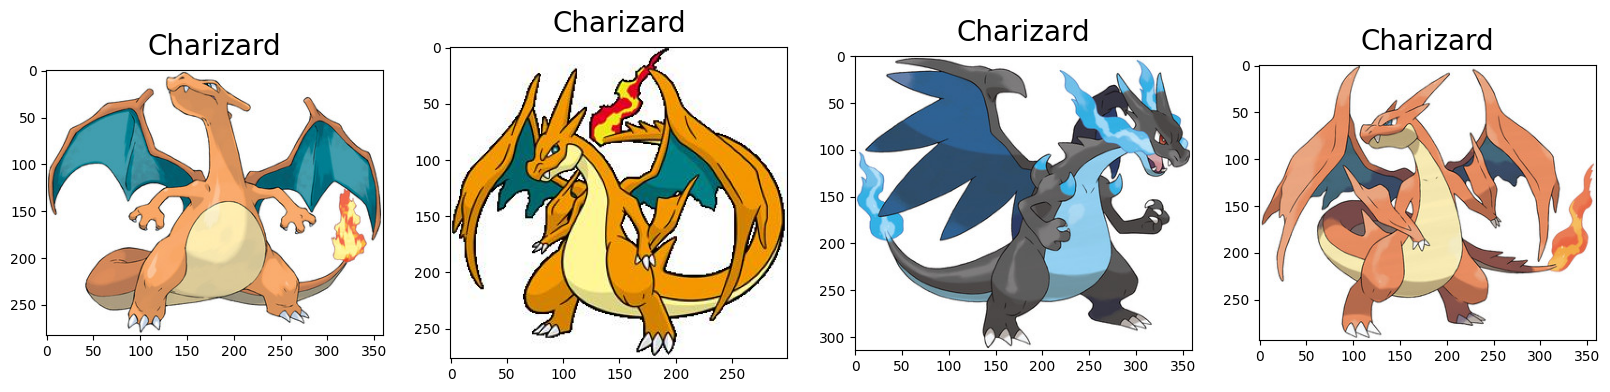

In [ ]:
select_pokemon="Charizard"
rows,columns = 1,4

display_folder=os.path.join(dataset, select_pokemon)
total_images=rows*columns
fig=plt.figure(1, figsize=(20, 10))

for i,j in enumerate(os.listdir(display_folder)):

    img = plt.imread(os.path.join(display_folder,j))
    fig=plt.subplot(rows, columns, i+1)
    fig.set_title(select_pokemon, pad = 11, size=20)
    plt.imshow(img)

    if i==total_images-1:
        break

In [ ]:
import os, random, pathlib, warnings, itertools, math
warnings.filterwarnings("ignore")

def count_files(rootdir):
    for path in pathlib.Path(rootdir).iterdir():
        if path.is_dir():
            print("There are " + str(len([name for name in os.listdir(path) \
            if os.path.isfile(os.path.join(path, name))])) + " files in " + \
            str(path.name))

count_files(os.path.join(dataset))

There are 2 files in Zweilous
There are 4 files in Zubat
There are 6 files in Zygarde
There are 3 files in Zeraora
There are 2 files in Zoroark
There are 2 files in Zorua
There are 3 files in Zigzagoon
There are 4 files in Zekrom
There are 2 files in Zarude
There are 2 files in Zebstrika
There are 3 files in Zamazenta
There are 3 files in Yanma
There are 2 files in Zangoose
There are 2 files in Yanmega
There are 3 files in Zacian
There are 6 files in Zapdos
There are 5 files in Yveltal
There are 2 files in Yungoos
There are 3 files in Yamask
There are 2 files in Yamper
There are 3 files in Xatu
There are 5 files in Xerneas
There are 2 files in Wynaut
There are 2 files in Wurmple
There are 2 files in Wooloo
There are 3 files in Wooper
There are 2 files in Woobat
There are 2 files in Xurkitree
There are 3 files in Wobbuffet
There are 6 files in Wormadam
There are 4 files in Wigglytuff
There are 4 files in Wishiwashi
There are 2 files in Whimsicott
There are 2 files in Wimpod
There are 2 

# **Preprocess**

In [ ]:
output_directory = '/content/drive/MyDrive/resized_and_augmented_pokemon_images'
os.makedirs(output_directory, exist_ok=True)
print(f"Output directory created at: {output_directory}")

Output directory created at: /content/drive/MyDrive/resized_and_augmented_pokemon_images


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image

def resize_image(image_path, size):
    with Image.open(image_path) as img:
        return img.resize(size)


In [ ]:
import cv2
import numpy as np
from PIL import Image

def apply_enhancement_only(image_array):
    """
    Applies CLAHE (Contrast) and Sharpening to a NumPy image array (H, W, C)
    and returns the enhanced array in the [0, 255] range.
    """
    # 1. Ensure array is uint8 for cv2
    image_uint8 = image_array.astype('uint8')

    # 2. Enhancement: Contrast Adjustment (CLAHE)
    lab = cv2.cvtColor(image_uint8, cv2.COLOR_RGB2LAB)
    l, a, b = cv2.split(lab)

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)

    limg = cv2.merge((cl, a, b))
    enhanced_img = cv2.cvtColor(limg, cv2.COLOR_LAB2RGB)

    # 3. Enhancement: Sharpening (Simple Kernel)
    sharpening_kernel = np.array([[-1, -1, -1],
                                  [-1,  9, -1],
                                  [-1, -1, -1]])

    sharpened_img = cv2.filter2D(enhanced_img.astype('float32'), -1, sharpening_kernel)

    # Clip and convert back to uint8 for saving
    final_enhanced_array = np.clip(sharpened_img, 0, 255).astype('uint8')

    return final_enhanced_array

In [ ]:
for pokemon_name in os.listdir(dataset):
    pokemon_folder_path = os.path.join(dataset, pokemon_name)
    if os.path.isdir(pokemon_folder_path):
        # Create a corresponding folder in the output directory for each Pokemon
        output_pokemon_folder = os.path.join(output_directory, pokemon_name)
        os.makedirs(output_pokemon_folder, exist_ok=True)

        print(f"Processing images in {pokemon_name} folder...")
        for image_file in os.listdir(pokemon_folder_path):
            if image_file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
                image_full_path = os.path.join(pokemon_folder_path, image_file)
                resized_img = resize_image(image_full_path, size=(224, 224))

                # Save the resized image to the new output folder
                output_image_path = os.path.join(output_pokemon_folder, image_file)
                resized_img.save(output_image_path)
        print(f"Finished processing {pokemon_name}. Resized images saved to {output_pokemon_folder}")

print("All images resized and saved.")

Processing images in Zweilous folder...
Finished processing Zweilous. Resized images saved to /content/drive/MyDrive/resized_and_augmented_pokemon_images/Zweilous
Processing images in Zubat folder...
Finished processing Zubat. Resized images saved to /content/drive/MyDrive/resized_and_augmented_pokemon_images/Zubat
Processing images in Zygarde folder...
Finished processing Zygarde. Resized images saved to /content/drive/MyDrive/resized_and_augmented_pokemon_images/Zygarde
Processing images in Zeraora folder...
Finished processing Zeraora. Resized images saved to /content/drive/MyDrive/resized_and_augmented_pokemon_images/Zeraora
Processing images in Zoroark folder...
Finished processing Zoroark. Resized images saved to /content/drive/MyDrive/resized_and_augmented_pokemon_images/Zoroark
Processing images in Zorua folder...
Finished processing Zorua. Resized images saved to /content/drive/MyDrive/resized_and_augmented_pokemon_images/Zorua
Processing images in Zigzagoon folder...
Finished

In [ ]:
for pokemon_name in os.listdir(dataset):
    pokemon_folder_path = os.path.join(dataset, pokemon_name)
    if os.path.isdir(pokemon_folder_path):
        # Create a corresponding folder in the output directory for each Pokemon
        output_pokemon_folder = os.path.join(output_directory, pokemon_name)
        os.makedirs(output_pokemon_folder, exist_ok=True)

        print(f"Processing images in {pokemon_name} folder...")
        for image_file in os.listdir(pokemon_folder_path):
            if image_file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
                image_full_path = os.path.join(pokemon_folder_path, image_file)

                try:
                    # 1. Resize image
                    # Assuming target_size = (224, 224)
                    resized_img = resize_image(image_full_path, size=(224, 224))

                    # Convert PIL image to NumPy array for OpenCV/Enhancement
                    resized_img_array = np.array(resized_img)

                    # 2. Apply Custom Preprocess (Enhancement Only)
                    # This applies CLAHE and sharpening.
                    enhanced_img_array = apply_enhancement_only(resized_img_array)

                    # 3. Convert the enhanced NumPy array back to a PIL Image for saving
                    final_img_to_save = Image.fromarray(enhanced_img_array)

                    # 4. Save the enhanced image to the new output folder
                    output_image_path = os.path.join(output_pokemon_folder, image_file)
                    final_img_to_save.save(output_image_path)

                except Exception as e:
                    print(f"Error processing {image_file} in {pokemon_name}: {e}")

        print(f"Finished processing {pokemon_name}. Enhanced images saved to {output_pokemon_folder}")

print("All images resized, enhanced, and saved.")

Processing images in Zweilous folder...
Finished processing Zweilous. Enhanced images saved to /content/drive/MyDrive/resized_and_augmented_pokemon_images/Zweilous
Processing images in Zubat folder...
Finished processing Zubat. Enhanced images saved to /content/drive/MyDrive/resized_and_augmented_pokemon_images/Zubat
Processing images in Zygarde folder...
Finished processing Zygarde. Enhanced images saved to /content/drive/MyDrive/resized_and_augmented_pokemon_images/Zygarde
Processing images in Zeraora folder...
Finished processing Zeraora. Enhanced images saved to /content/drive/MyDrive/resized_and_augmented_pokemon_images/Zeraora
Processing images in Zoroark folder...
Finished processing Zoroark. Enhanced images saved to /content/drive/MyDrive/resized_and_augmented_pokemon_images/Zoroark
Processing images in Zorua folder...
Finished processing Zorua. Enhanced images saved to /content/drive/MyDrive/resized_and_augmented_pokemon_images/Zorua
Processing images in Zigzagoon folder...
Fi

In [ ]:
resized_images_dataset='/content/drive/MyDrive/resized_and_augmented_pokemon_images'

In [ ]:
train_base_dir = '/content/drive/MyDrive/pokemon_split/train'
test_base_dir = '/content/drive/MyDrive/pokemon_split/validation'

os.makedirs(train_base_dir, exist_ok=True)
os.makedirs(test_base_dir, exist_ok=True)

print(f"Training base directory created at: {train_base_dir}")
print(f"Validation base directory created at: {test_base_dir}")

Training base directory created at: /content/drive/MyDrive/pokemon_split/train
Validation base directory created at: /content/drive/MyDrive/pokemon_split/validation


In [ ]:
import shutil

for pokemon_name in os.listdir(resized_images_dataset):
    pokemon_resized_folder_path = os.path.join(resized_images_dataset, pokemon_name)

    if os.path.isdir(pokemon_resized_folder_path):
        # Create class-specific directories in train and validation folders
        os.makedirs(os.path.join(train_base_dir, pokemon_name), exist_ok=True)
        os.makedirs(os.path.join(test_base_dir, pokemon_name), exist_ok=True)

        all_images = [f for f in os.listdir(pokemon_resized_folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]
        random.shuffle(all_images)

        train_split_idx = int(0.8 * len(all_images))
        train_images = all_images[:train_split_idx]
        test_images = all_images[train_split_idx:]

        print(f"Splitting images for {pokemon_name}: {len(train_images)} for training, {len(test_images)} for validation.")

        # Copy images to respective folders
        for img_name in train_images:
            src_path = os.path.join(pokemon_resized_folder_path, img_name)
            dest_path = os.path.join(train_base_dir, pokemon_name, img_name)
            shutil.copy(src_path, dest_path)

        for img_name in test_images:
            src_path = os.path.join(pokemon_resized_folder_path, img_name)
            dest_path = os.path.join(test_base_dir, pokemon_name, img_name)
            shutil.copy(src_path, dest_path)

print("Finished splitting all resized images into training and validation sets.")

Splitting images for Zweilous: 1 for training, 1 for validation.
Splitting images for Zubat: 3 for training, 1 for validation.
Splitting images for Zygarde: 4 for training, 2 for validation.
Splitting images for Zeraora: 2 for training, 1 for validation.
Splitting images for Zoroark: 1 for training, 1 for validation.
Splitting images for Zorua: 1 for training, 1 for validation.
Splitting images for Zigzagoon: 2 for training, 1 for validation.
Splitting images for Zekrom: 3 for training, 1 for validation.
Splitting images for Zarude: 1 for training, 1 for validation.
Splitting images for Zebstrika: 1 for training, 1 for validation.
Splitting images for Zamazenta: 2 for training, 1 for validation.
Splitting images for Yanma: 2 for training, 1 for validation.
Splitting images for Zangoose: 1 for training, 1 for validation.
Splitting images for Yanmega: 1 for training, 1 for validation.
Splitting images for Zacian: 2 for training, 1 for validation.
Splitting images for Zapdos: 4 for traini

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import preprocess_input

def final_normalization_only(image):
    return preprocess_input(image)

train_datagen = ImageDataGenerator(
    rotation_range=20,        # Rotate images by up to 40 degrees
    width_shift_range=0.2,    # Shift images horizontally by up to 20% of the width
    height_shift_range=0.2,   # Shift images vertically by up to 20% of the height
    shear_range=0.2,          # Apply shear transformation
    zoom_range=0.2,           # Zoom in/out by up to 20%
    horizontal_flip=True,     # Flip images horizontally
    brightness_range=(0.5, 1.5), # Adjust brightness
    fill_mode='nearest',
    preprocessing_function=final_normalization_only
    )

test_datagen = ImageDataGenerator(
    preprocessing_function = final_normalization_only,
    )

print("ImageDataGenerator instances created for training and test.")

ImageDataGenerator instances created for training and test.


In [ ]:
batch_size = 32
img_size = (224, 224)

train_generator = train_datagen.flow_from_directory(
    train_base_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_base_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

print("Training and validation data generators created.")

Found 1553 images belonging to 898 classes.
Found 950 images belonging to 898 classes.
Training and validation data generators created.


In [ ]:
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import os

IMAGE_SIZE = [224, 224]

# Initialize the InceptionV3 model without the top classification layer
resnet101 = ResNet101(
    input_shape=IMAGE_SIZE + [3],
    include_top=False,
    weights=None,
)

weights_path = '/content/drive/MyDrive/resnet101_weights_tf_dim_ordering_tf_kernels_notop.h5'
resnet101.load_weights(weights_path)

for layer in resnet101 .layers:
    layer.trainable = False

x = resnet101.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)

classification = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=resnet101.input, outputs=classification)

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='CategoricalCrossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_13      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_13[0… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 43,036,290 (164.17 MB)

 Trainable params: 378,114 (1.44 MB)

 Non-trainable params: 42,658,176 (162.73 MB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',     # Metric to monitor
    patience=15,             # Number of epochs with no improvement after which training will be stopped.
    mode='min',             # The direction is 'min' since we are monitoring loss.
    restore_best_weights=True # Restore model weights from the epoch with the best value of the monitored metric.
)


r = model.fit(
  train_generator,
  validation_data=test_generator,
  epochs=50,
  callbacks = [early_stopping],
  steps_per_epoch=len(train_generator),
  validation_steps=len(test_generator)
)

Epoch 1/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.0028 - loss: 6.8884 - val_accuracy: 0.0116 - val_loss: 6.7487
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 34s 675ms/step - accuracy: 0.0107 - loss: 6.6255 - val_accuracy: 0.0147 - val_loss: 6.5760
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 33s 672ms/step - accuracy: 0.0206 - loss: 6.1763 - val_accuracy: 0.0389 - val_loss: 6.3439
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 33s 676ms/step - accuracy: 0.0685 - loss: 5.6711 - val_accuracy: 0.0589 - val_loss: 6.1185
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 33s 668ms/step - accuracy: 0.0962 - loss: 5.1790 - val_accuracy: 0.1011 - val_loss: 5.7569
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 33s 675ms/step - accuracy: 0.1382 - loss: 4.6920 - val_accuracy: 0.1242 - val_loss: 5.4580
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 32s 660ms/step - accuracy: 0.2114 - loss: 4.1002 - val_accuracy: 0.1537 - val_loss: 5.0217
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 34s 695ms/step - accuracy: 0.2556 - loss: 3.6530 - val_accurac

In [ ]:
# Save the model to Google Drive
save_path = '/content/drive/MyDrive/model50.keras'
model.save(save_path)
print(f' Model saved successfully to {save_path}')

 Model saved successfully to /content/drive/MyDrive/model50.keras


# **Accuracy and Loss Curve**

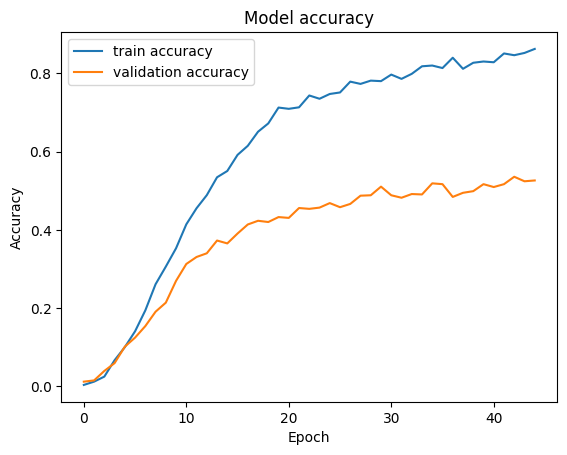

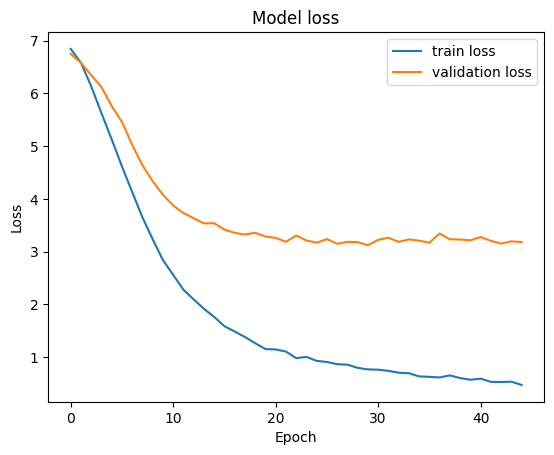

In [ ]:
def plot_accuracy(history):

    plt.plot(history.history['accuracy'],label='train accuracy')
    plt.plot(history.history['val_accuracy'],label='validation accuracy')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig('Accuracy_v1_Resnet101')
    plt.show()

def plot_loss(history):

    plt.plot(history.history['loss'],label="train loss")
    plt.plot(history.history['val_loss'],label="validation loss")
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig('Loss_v1_Resnet101')
    plt.show()

plot_accuracy(r)
plot_loss(r)

In [ ]:
from tensorflow.keras.models import load_model

path_to_model='/content/drive/MyDrive/model50.keras'
print("Loading the model..")
model = load_model(path_to_model)
print("Done!")

Loading the model..
Done!


In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
image_path = '/content/drive/MyDrive/pokemon_split/validation/Ditto/1.jpg'

def prepare_image_for_prediction(image_path, target_size, preprocessing_function):
    """
    Loads an image, resizes it, and applies the necessary preprocessing.
    """
    img = Image.open(image_path)
    img = img.resize(target_size)
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0) # Add batch dimension
    processed_img = preprocessing_function(img_array)
    return processed_img, img # Return original PIL image for display

target_size = (224, 224)
processed_image_for_pred, original_pil_image = prepare_image_for_prediction(
    image_path, target_size, final_normalization_only
)

print(f"Image loaded and preprocessed for prediction. Shape: {processed_image_for_pred.shape}")
print("Original PIL image also returned for display.")

Image loaded and preprocessed for prediction. Shape: (1, 224, 224, 3)
Original PIL image also returned for display.


In [ ]:
predictions = model.predict(processed_image_for_pred)

# Get the class index with the highest probability
predicted_class_index = np.argmax(predictions, axis=1)[0]

# Create a reverse mapping from index to class name
idx_to_class = {v: k for k, v in train_generator.class_indices.items()}
predicted_pokemon_name = idx_to_class[predicted_class_index]

print(f"Prediction performed. Predicted class index: {predicted_class_index}")
print(f"Predicted Pokémon name: {predicted_pokemon_name}")
print(f"Confidence: {predictions[0, predicted_class_index]:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
Prediction performed. Predicted class index: 184
Predicted Pokémon name: Ditto
Confidence: 0.9951


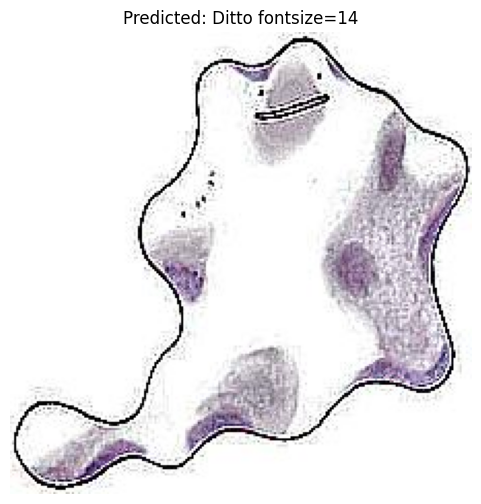


Prediction for 1.jpg:
  Predicted Pokémon: Ditto
  Confidence: 0.9951


In [ ]:
import matplotlib.pyplot as plt

# Display the image and prediction
plt.figure(figsize=(6, 6))
plt.imshow(original_pil_image)
plt.title(f"Predicted: {predicted_pokemon_name} fontsize=14")
plt.axis('off')
plt.show()

print(f"\nPrediction for {os.path.basename(image_path)}:")
print(f"  Predicted Pokémon: {predicted_pokemon_name}")
print(f"  Confidence: {predictions[0, predicted_class_index]:.4f}")

30/30 ━━━━━━━━━━━━━━━━━━━━ 18s 392ms/step

Saved FULL 898x898 matrix to 'confusion_matrix_full.npy'.


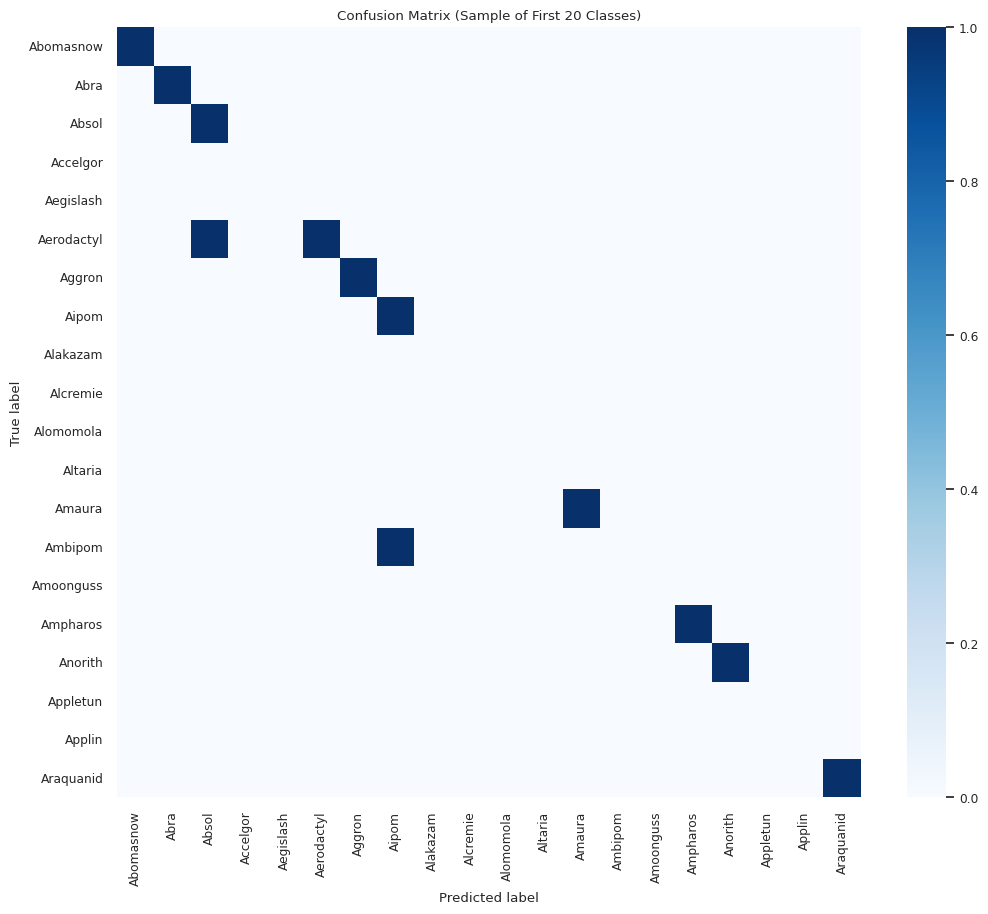

In [ ]:
# Assuming validation_generator and model are already defined and trained.
# (This is the same code block used in the sequential evaluation step)

import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Step 1: Generate Predictions (Efficiently in batches) ---

# Ensure the generator is reset to guarantee the prediction order matches the label order
test_generator.reset()

# Use the model to predict the entire validation set in batches
Y_pred = model.predict(test_generator, steps=len(test_generator))

# Get the predicted class indices (0 to 897)
y_pred_classes = np.argmax(Y_pred, axis=1)

# Get the true labels (0 to 897)
y_true = test_generator.classes

# Get the class names (subfolder names) for axis labels
class_names = list(test_generator.class_indices.keys())

# --- Step 2: Generate the Confusion Matrix ---
cm = confusion_matrix(y_true, y_pred_classes)

# --- Step 3: Print/Plot (Corrected for 898 Classes) ---

def print_confusion_matrix(cm, class_names):
    """
    Plots a sample of the confusion matrix for visualization and saves the full matrix.
    """
    total_output_labels = len(class_names)

    # Plotting is impossible for 898x898, so we plot a small subset (e.g., first 20 classes)
    SUBSET_SIZE = min(20, total_output_labels)

    # Save the full confusion matrix as a NumPy file for later analysis
    np.save('confusion_matrix_full.npy', cm)
    print(f"\nSaved FULL {total_output_labels}x{total_output_labels} matrix to 'confusion_matrix_full.npy'.")

    # Create a DataFrame for plotting the subset
    df_cm_subset = pd.DataFrame(
        cm[:SUBSET_SIZE, :SUBSET_SIZE],
        index=class_names[:SUBSET_SIZE],
        columns=class_names[:SUBSET_SIZE]
    )

    # Plotting the subset
    plt.figure(figsize=(12, 10))
    sns.set(font_scale=0.8)
    sns.heatmap(df_cm_subset, annot=False, cmap='Blues')

    plt.title(f'Confusion Matrix (Sample of First {SUBSET_SIZE} Classes)')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('confusion_matrix_sample.png')

    plt.show()

# Run the plotting function
print_confusion_matrix(cm, class_names)



Saved FULL 898x898 matrix to 'confusion_matrix_full.npy'.


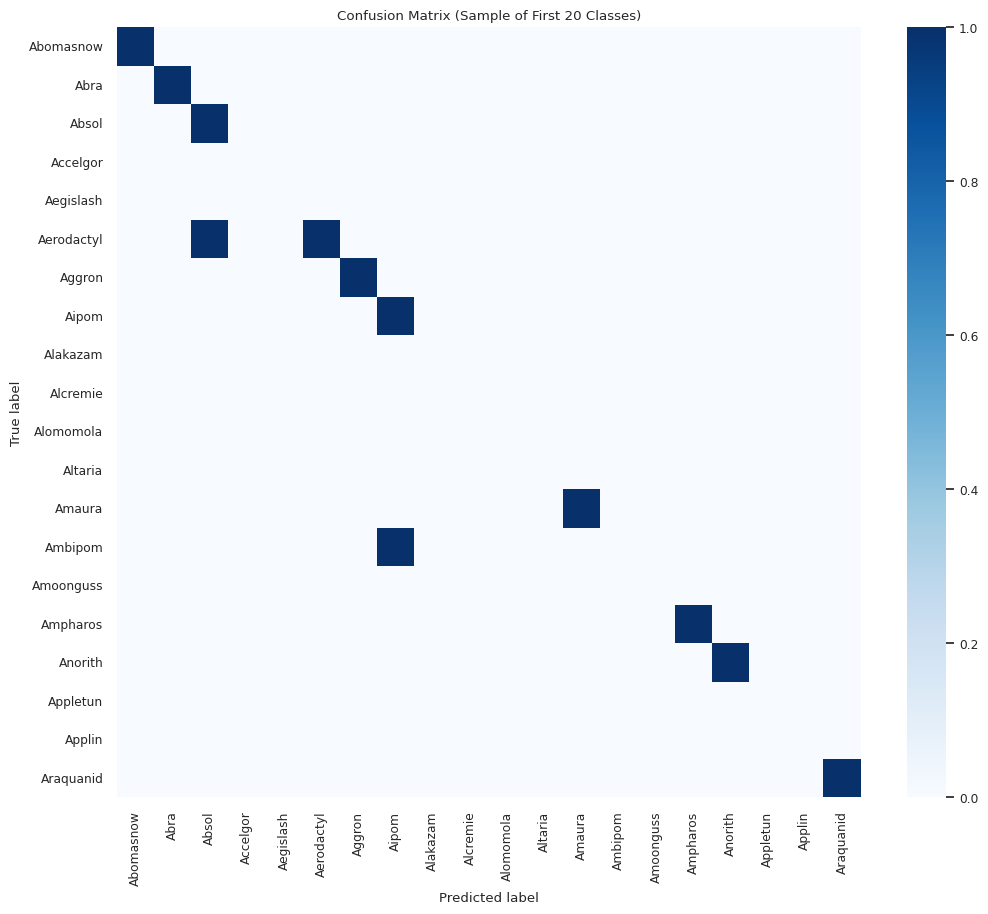

In [ ]:
print_confusion_matrix(cm, class_names)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# --- ASSUMED VARIABLES ---
# You must execute Step 8 (Evaluation) from the full sequential guide
# to obtain these three variables:
# 1. y_true: The true labels (array of shape (2000,))
# 2. y_pred_classes: The predicted class indices (array of shape (2000,))
# 3. class_names: The list of 898 class names (list of length 898)

# --- 1. Generate the Confusion Matrix ---
# Explicitly provide labels to ensure the confusion matrix is always 898x898
cm = confusion_matrix(y_true=y_true, y_pred=y_pred_classes, labels=np.arange(len(class_names)))

# --- 2. Plotting Function for Subsets ---

def plot_confusion_matrix_subsets(cm, class_names):
    """
    Creates multiple plots of the confusion matrix, with each plot showing
    a 40x40 block of classes for readability.
    """
    total_output_labels = len(class_names)
    BLOCK_SIZE = 40 # Set to 40 classes per plot as requested

    # Save the full confusion matrix as a NumPy file for later analysis
    np.save('confusion_matrix_full.npy', cm)
    print(f"\nSaved FULL {total_output_labels}x{total_output_labels} matrix data to 'confusion_matrix_full.npy'.")

    # Determine the start indices for each 40-class block
    starts = range(0, total_output_labels, BLOCK_SIZE)

    for plot_index, start in enumerate(starts):
        end = min(start + BLOCK_SIZE, total_output_labels)

        # Extract the subset of the matrix
        cm_subset = cm[start:end, start:end]

        # Extract the corresponding subset of class names
        class_names_subset = class_names[start:end]

        # Create DataFrame for plotting the subset
        df_cm_subset = pd.DataFrame(
            cm_subset,
            index=class_names_subset,
            columns=class_names_subset
        )

        # Create the plot
        plt.figure(figsize=(20, 18)) # Large figure size for better readability
        sns.set(font_scale=0.7)

        # Use annot=False to prevent cluttering the 40x40 plot with numbers
        sns.heatmap(df_cm_subset, annot=False, cmap='Blues', linewidths=0.5, linecolor='lightgray')

        # Title reflects the class range
        plt.title(f'Confusion Matrix Subset (Classes {start} to {end-1}) - Plot {plot_index + 1}')
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

        # Save the figure
        filename = f'confusion_matrix_subset_{plot_index+1:02d}.png'
        plt.savefig(filename)
        plt.close() # Close the figure to free up memory
        print(f"Saved plot: {filename}")

    print(f"\nSuccessfully generated {plot_index + 1} confusion matrix subplots.")

# Run the plotting function
# plot_confusion_matrix_subsets(cm, class_names)

30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 159ms/step


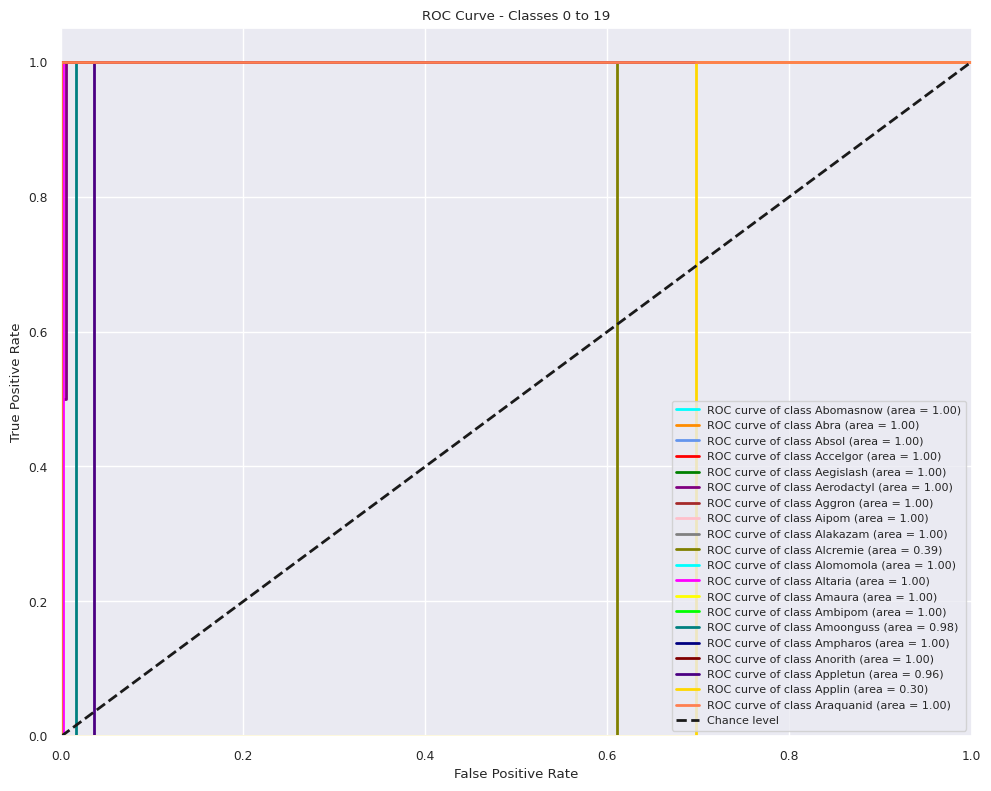

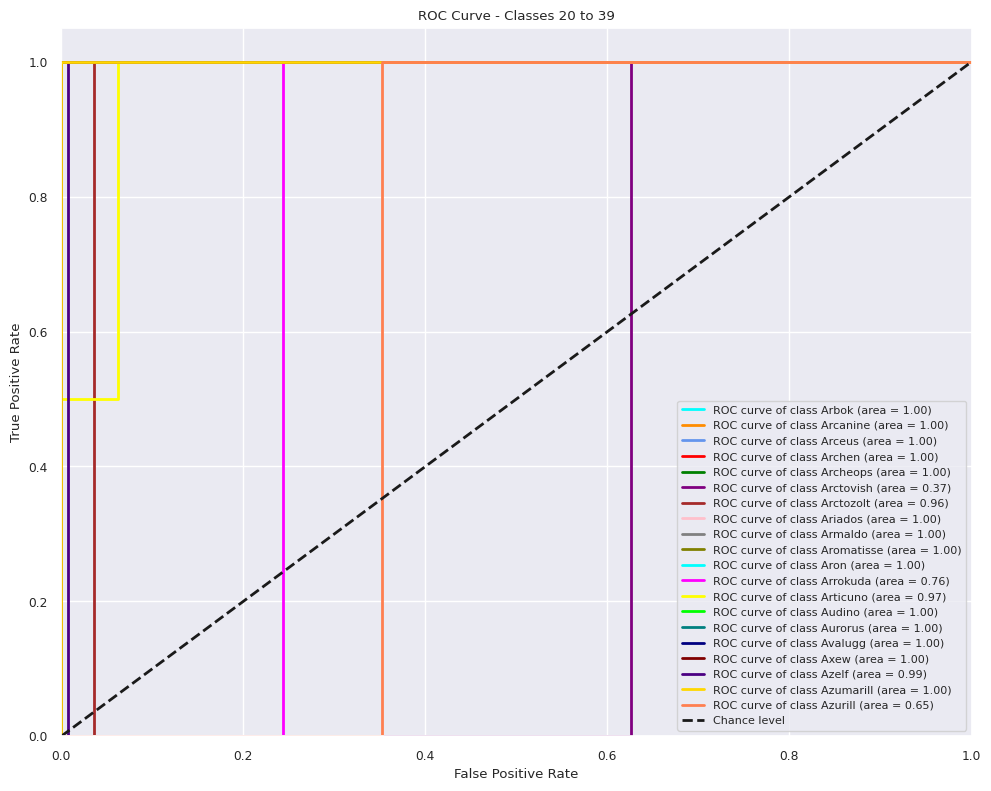

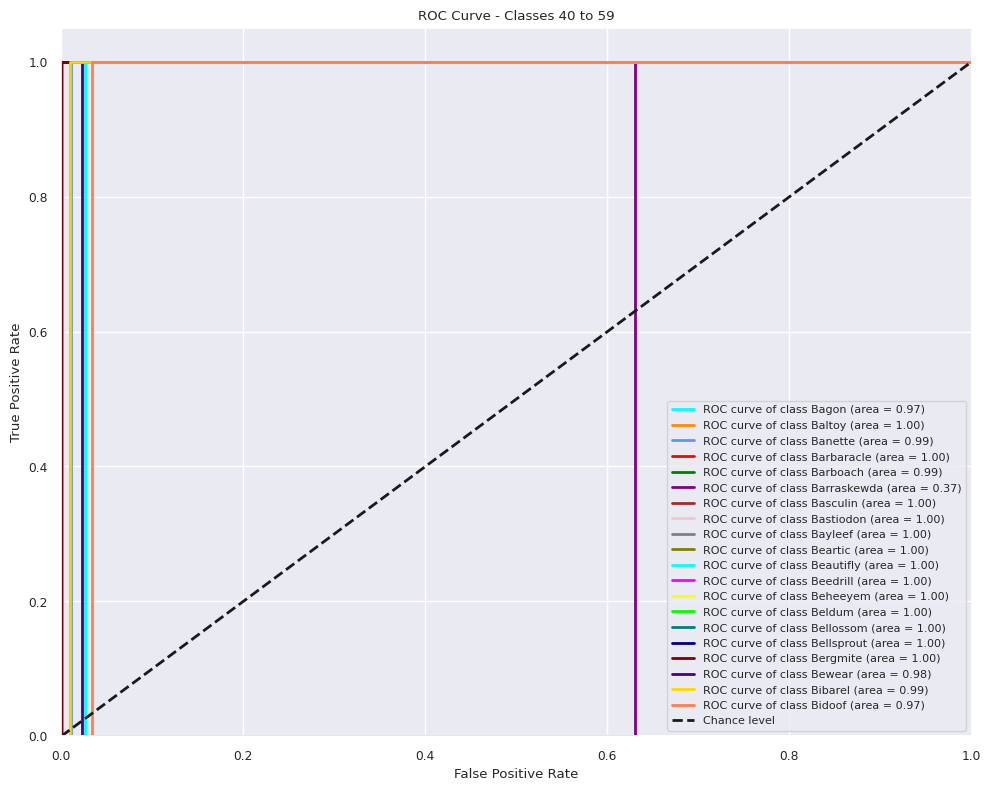

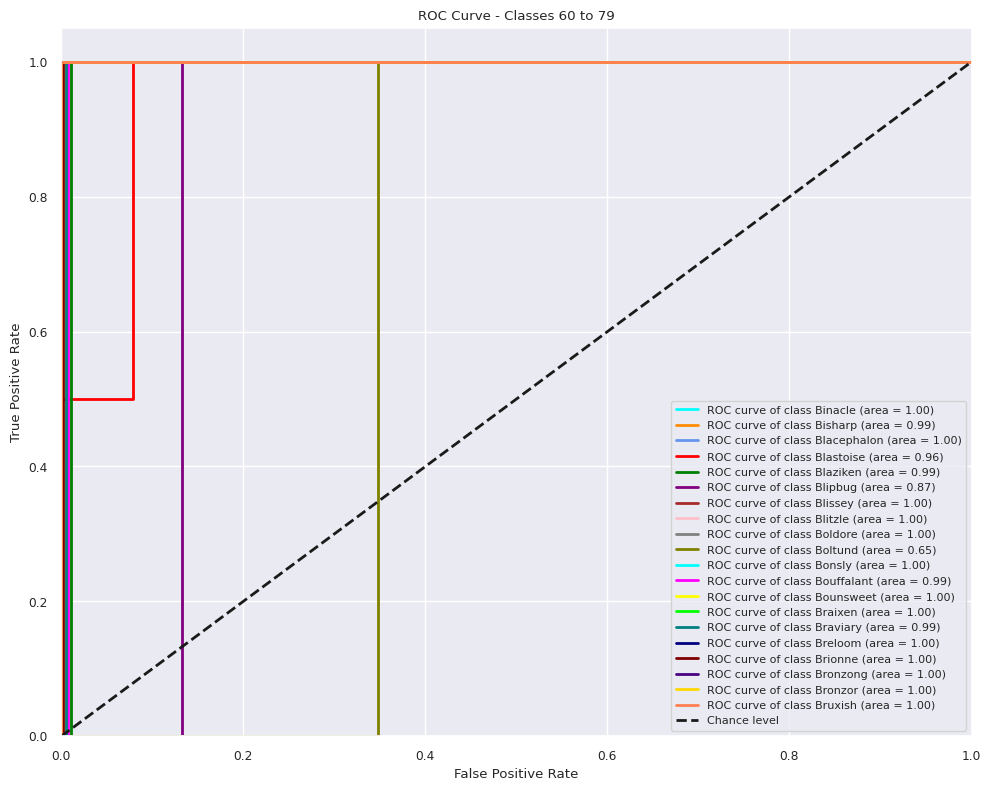

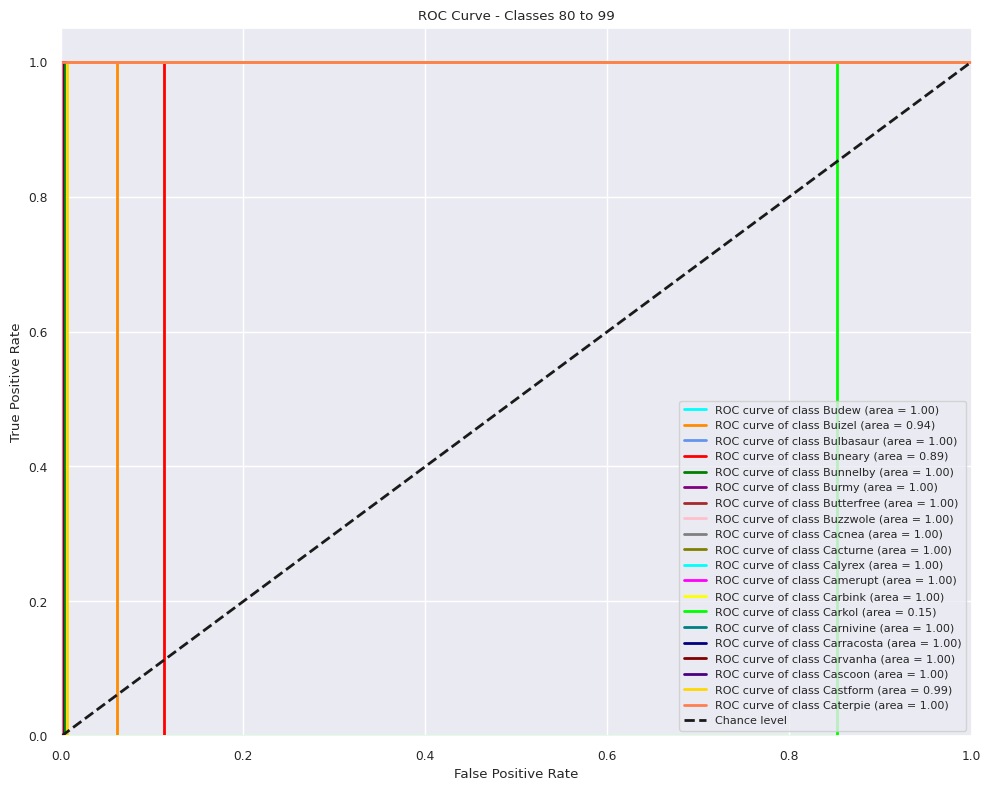

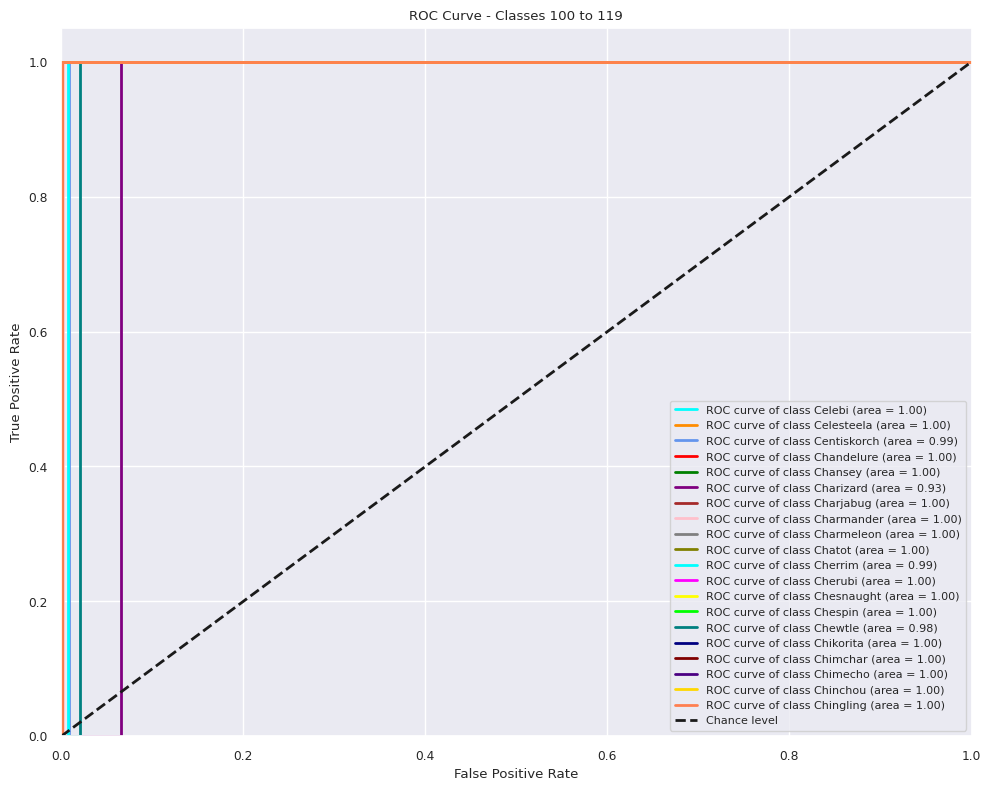

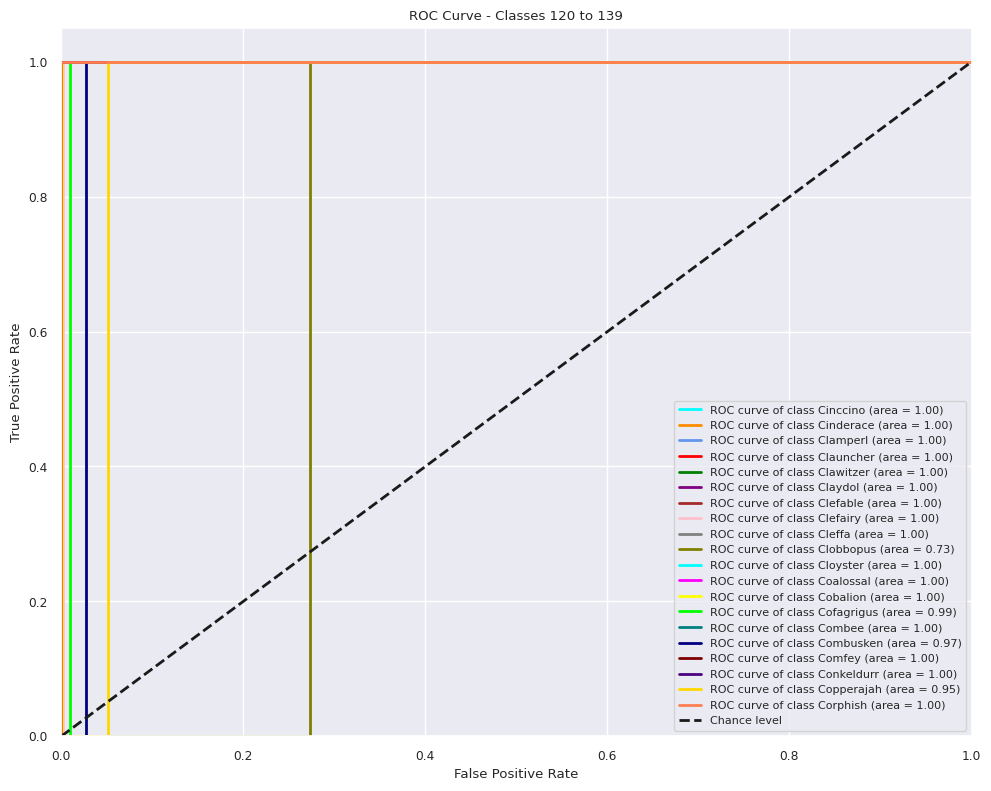

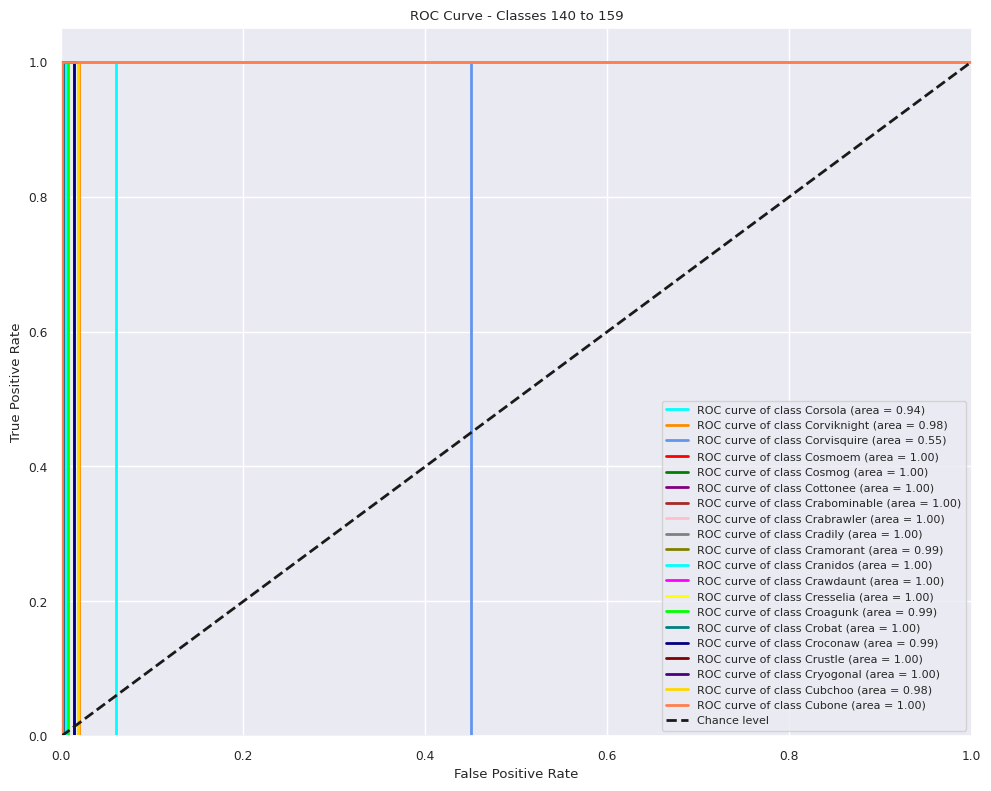

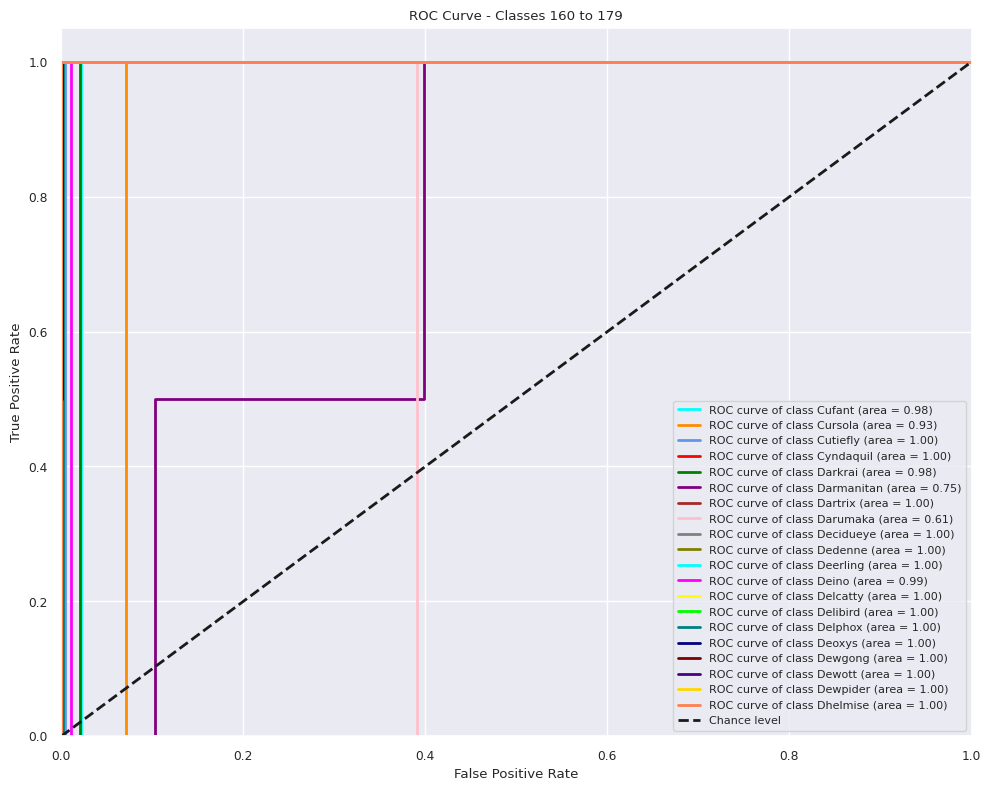

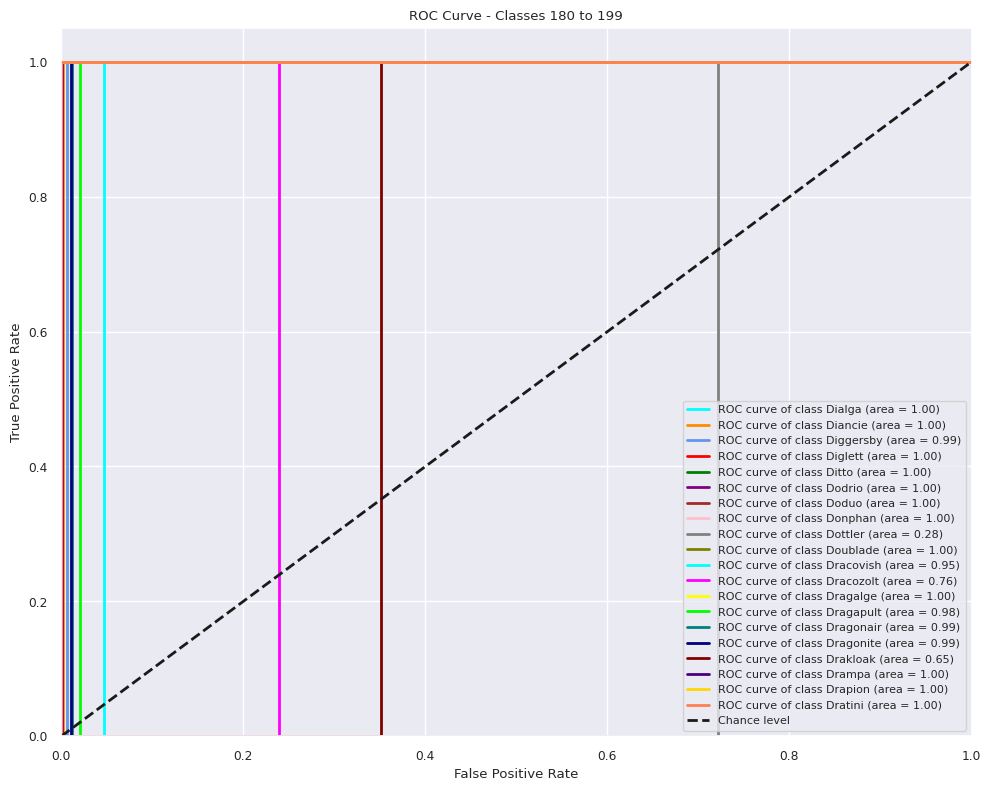

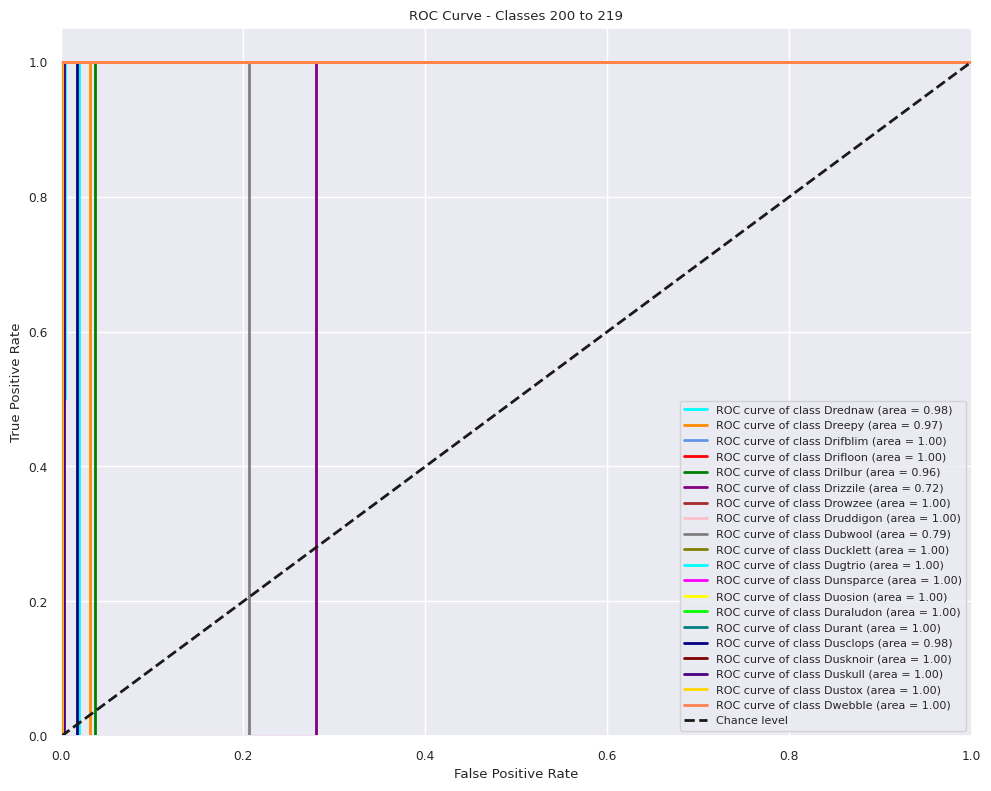

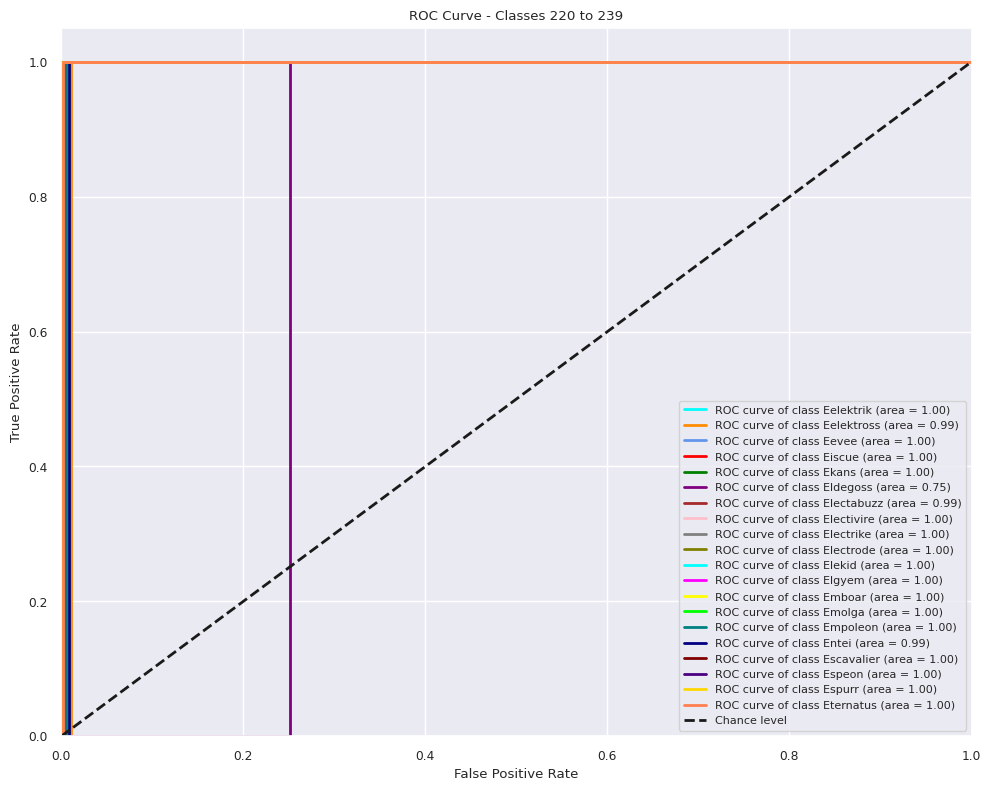

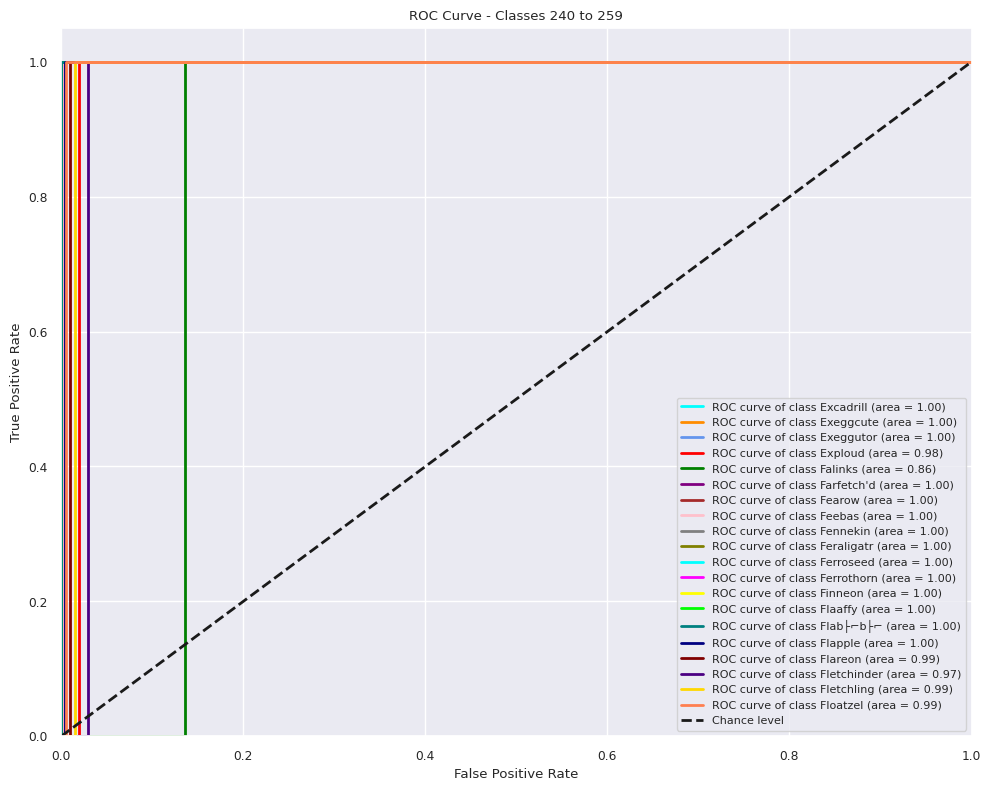

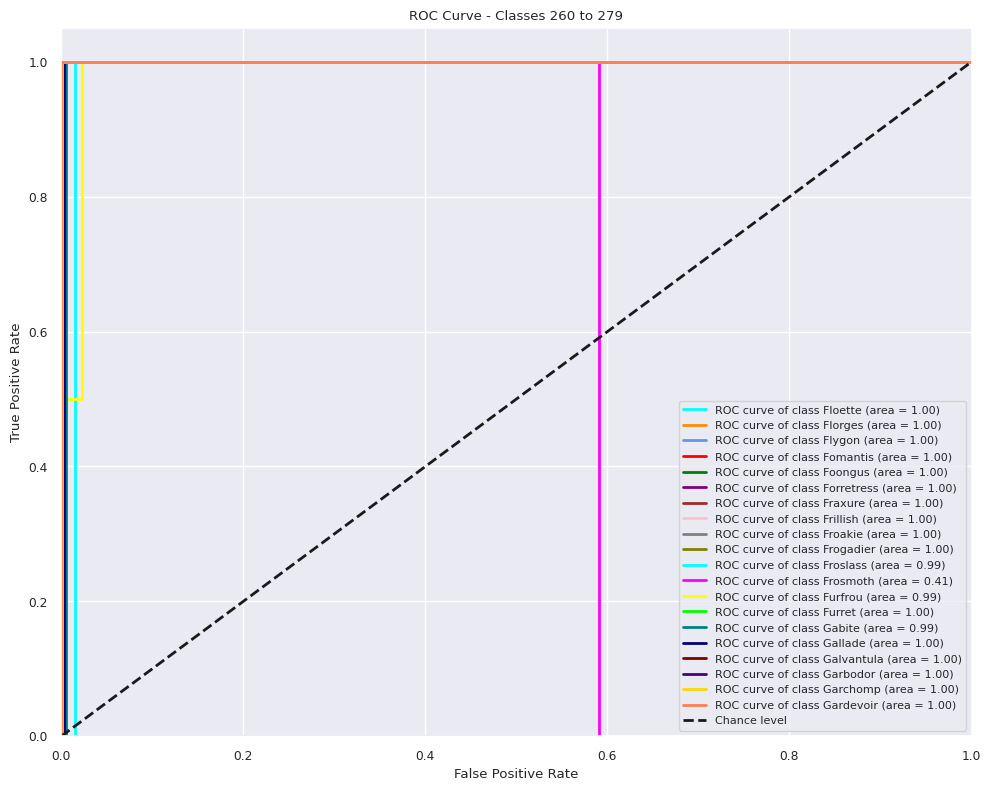

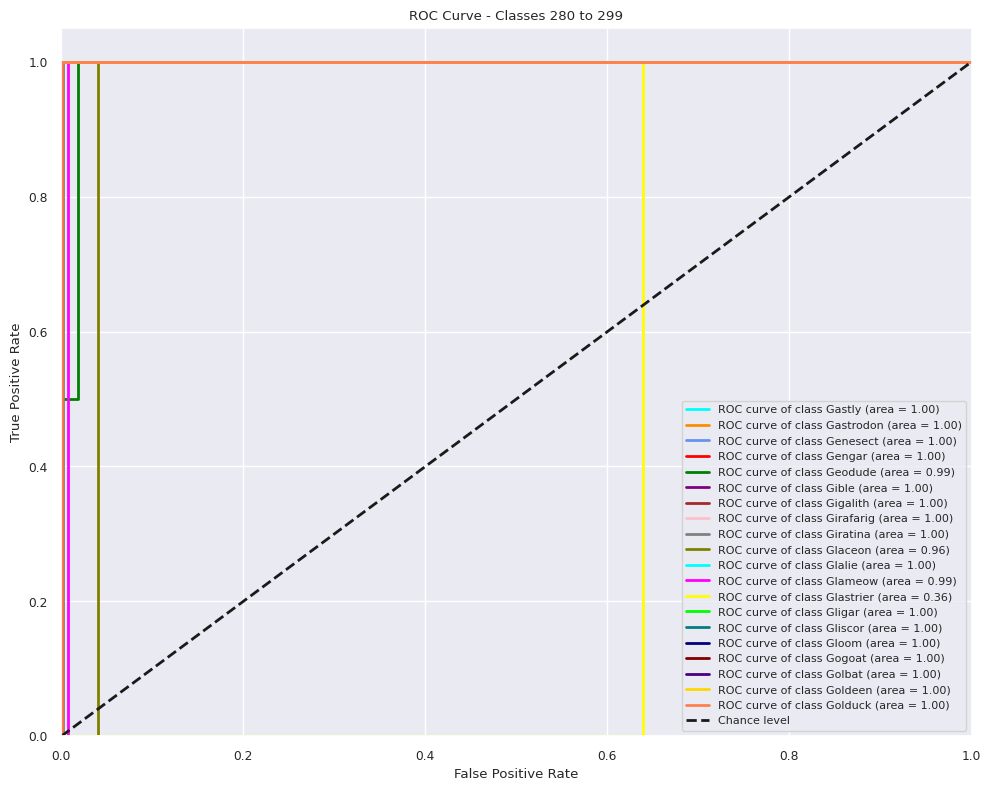

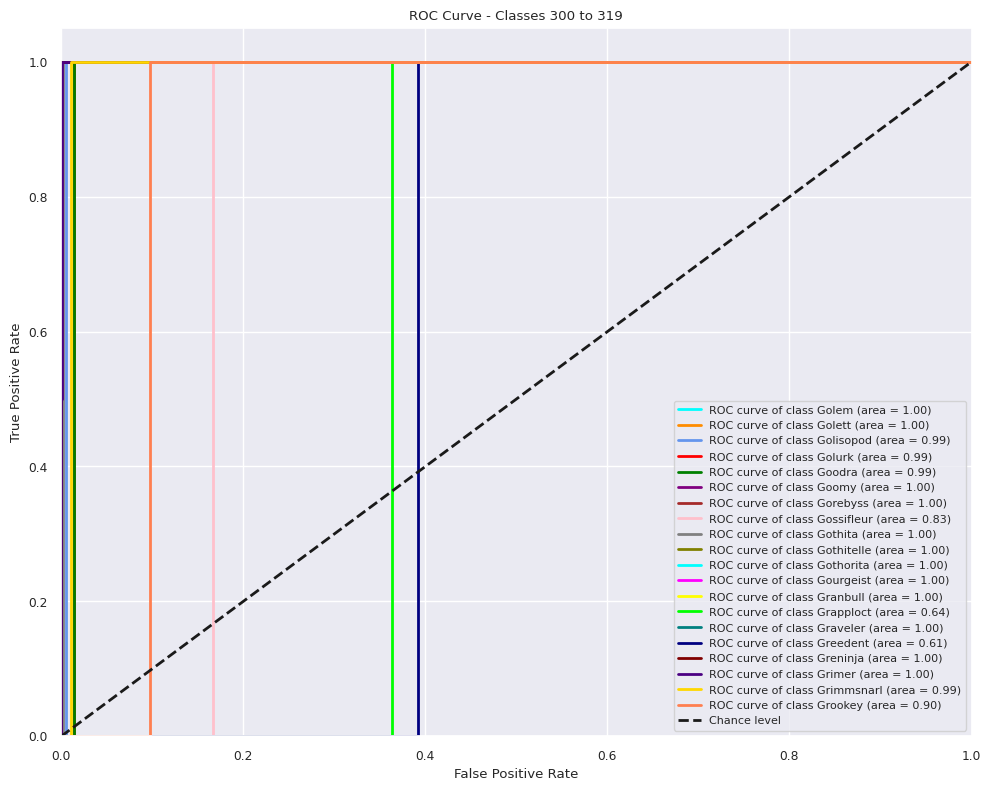

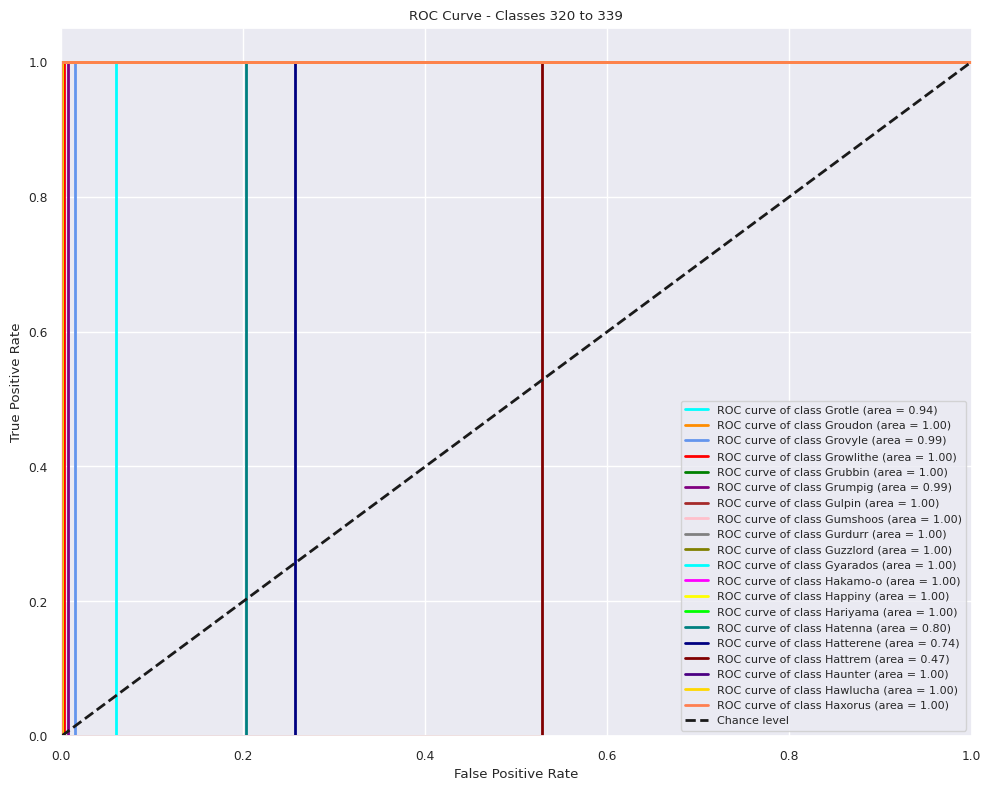

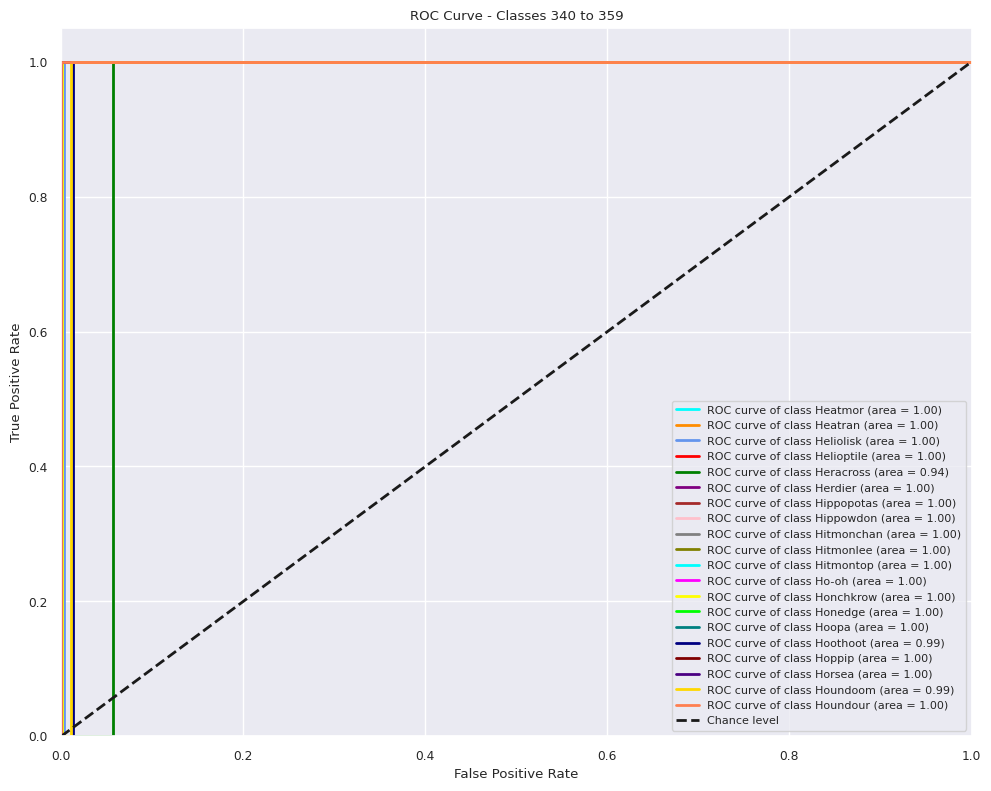

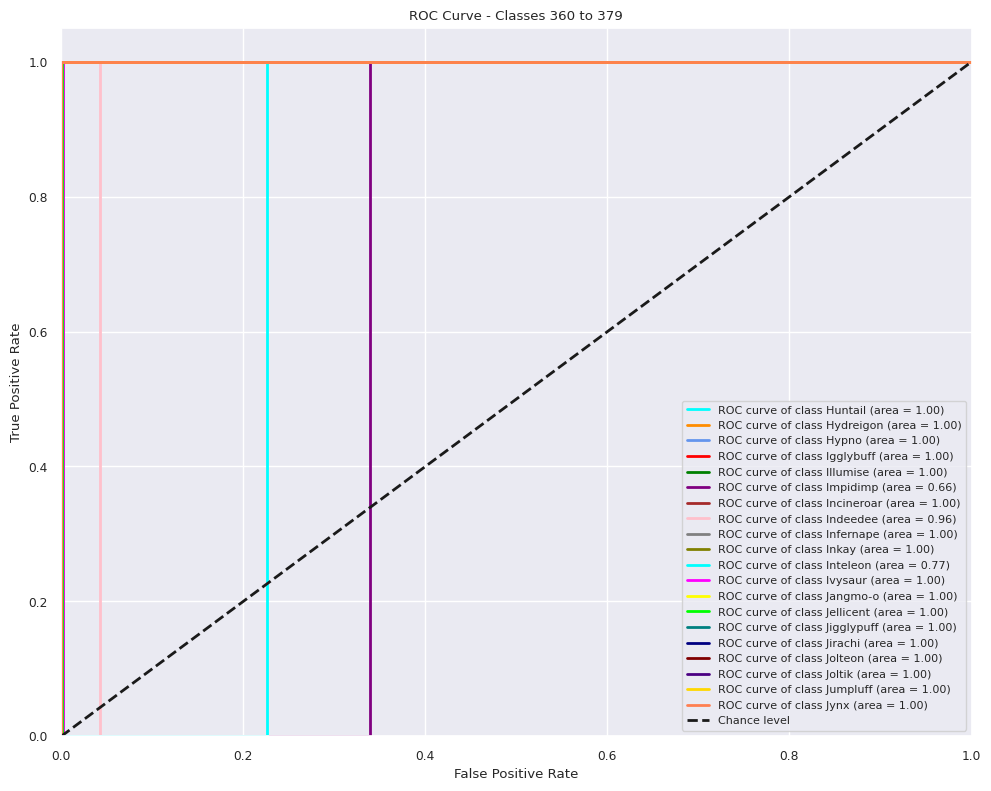

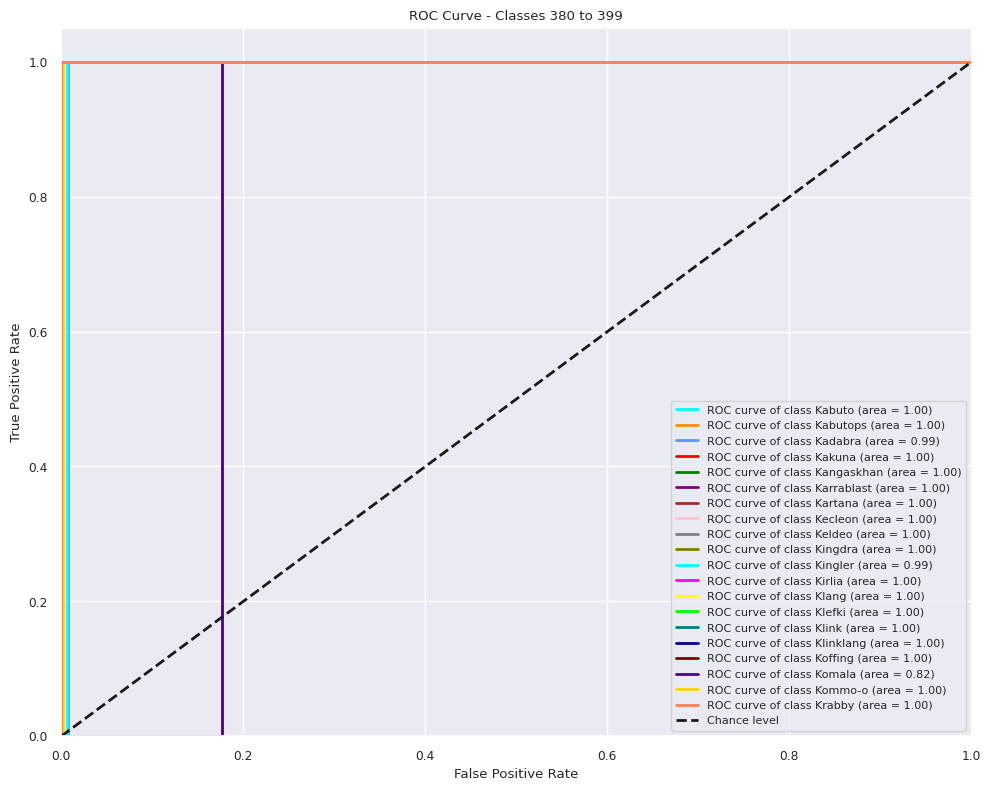

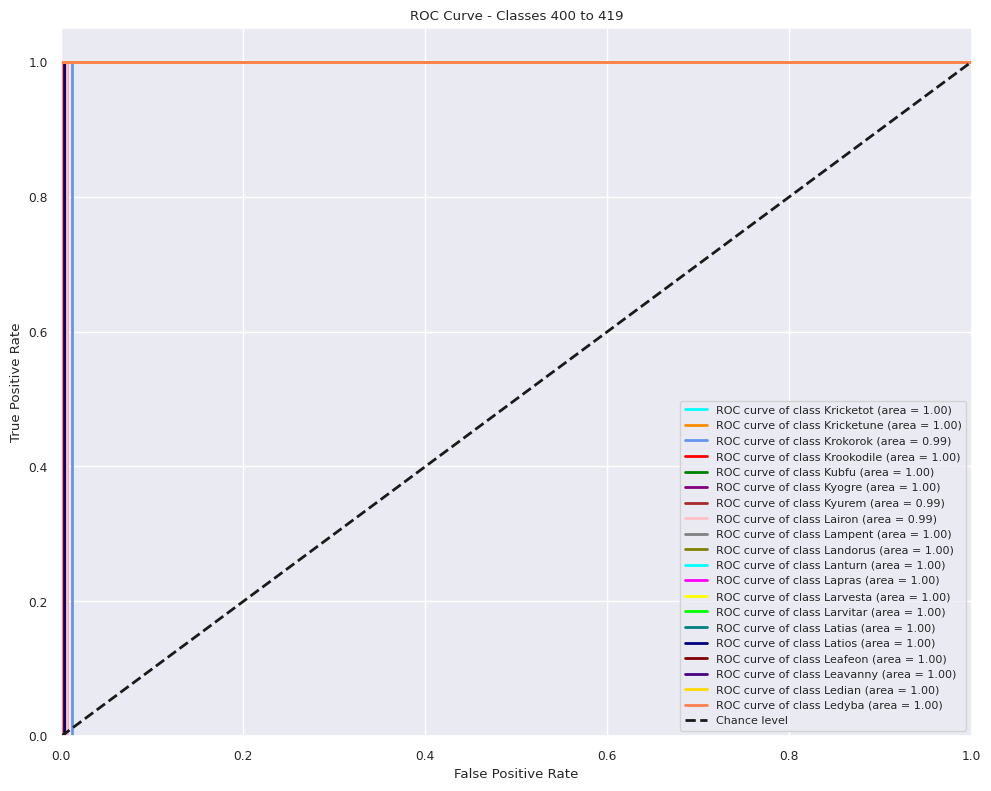

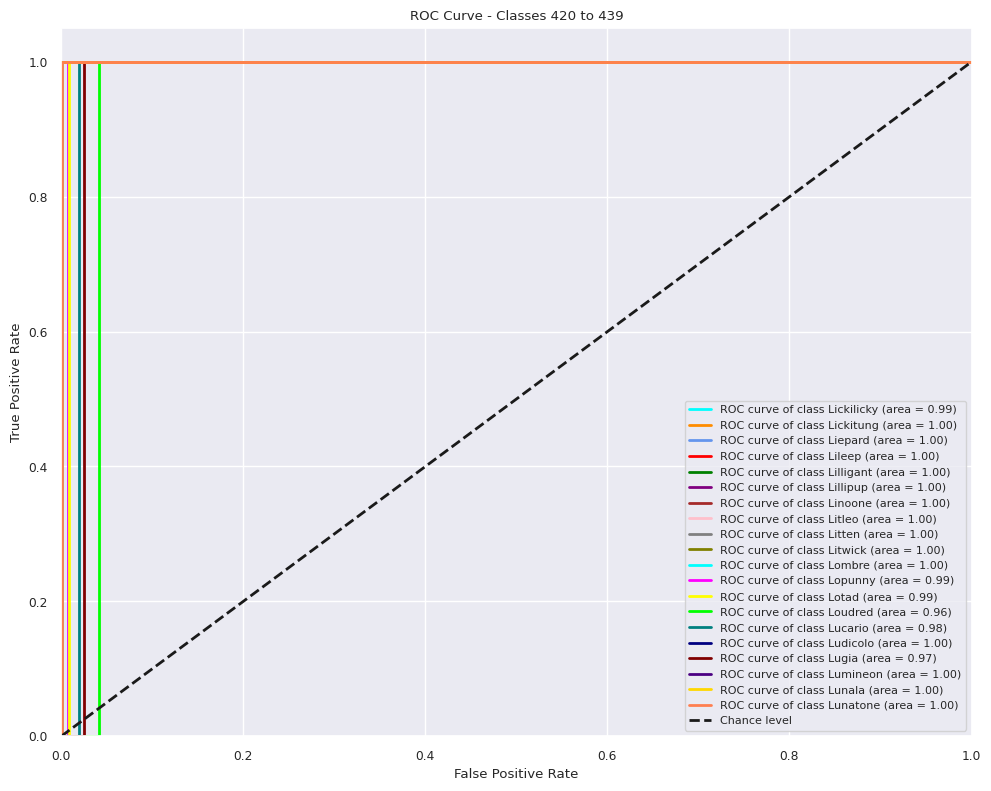

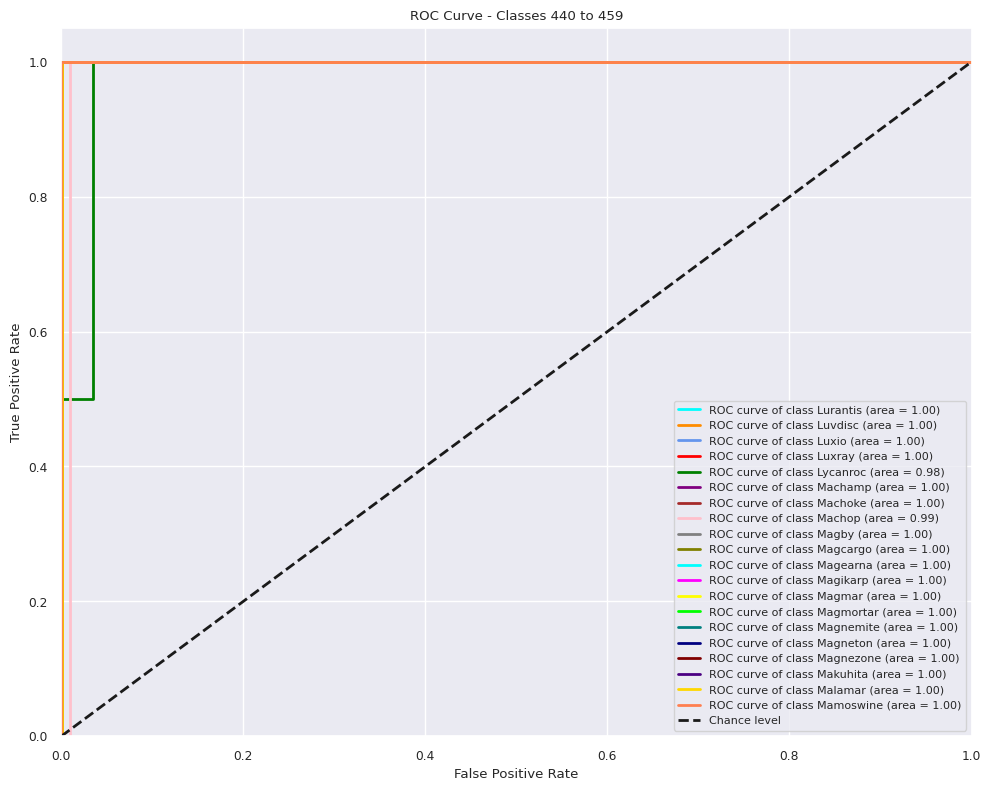

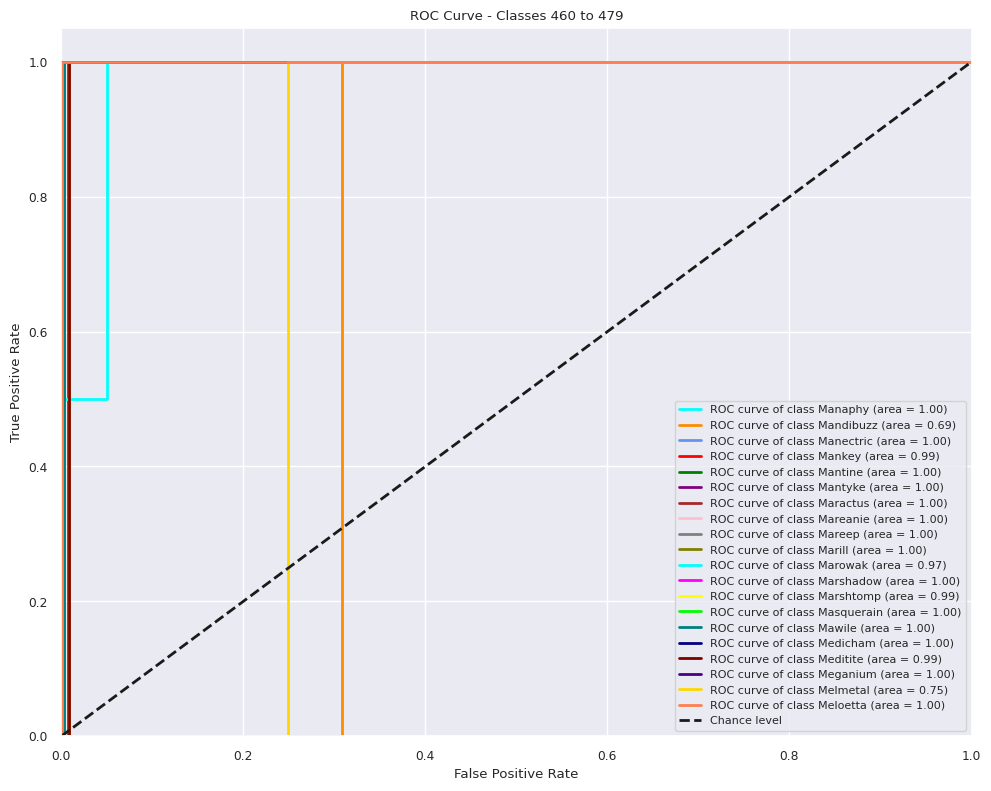

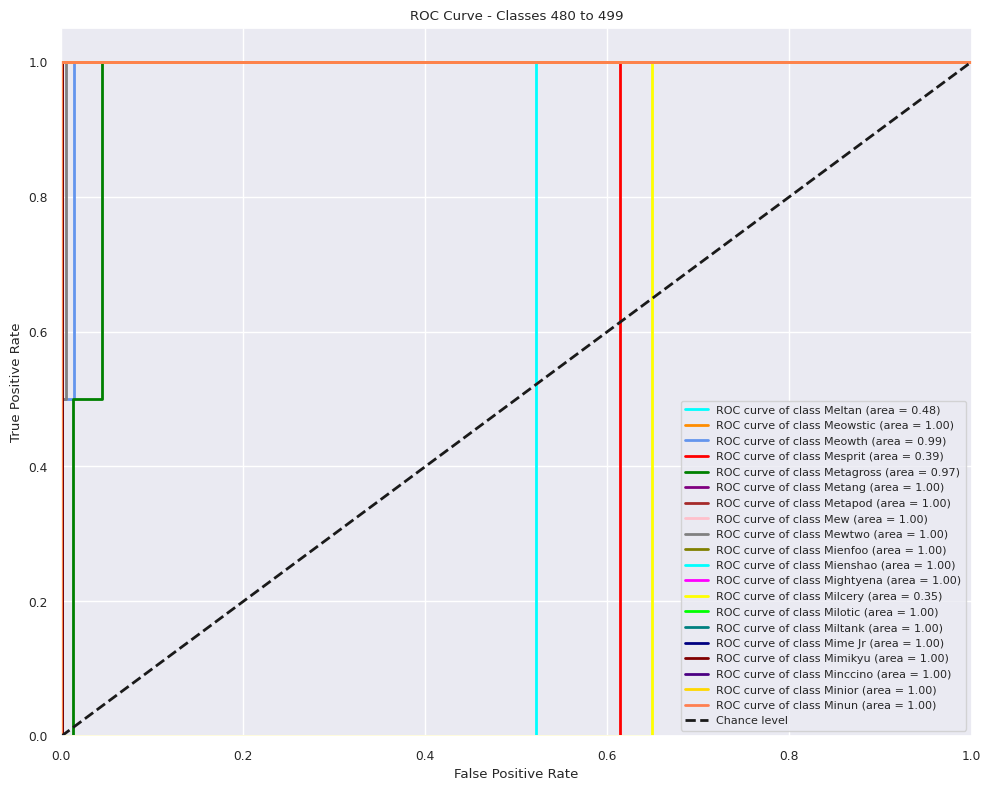

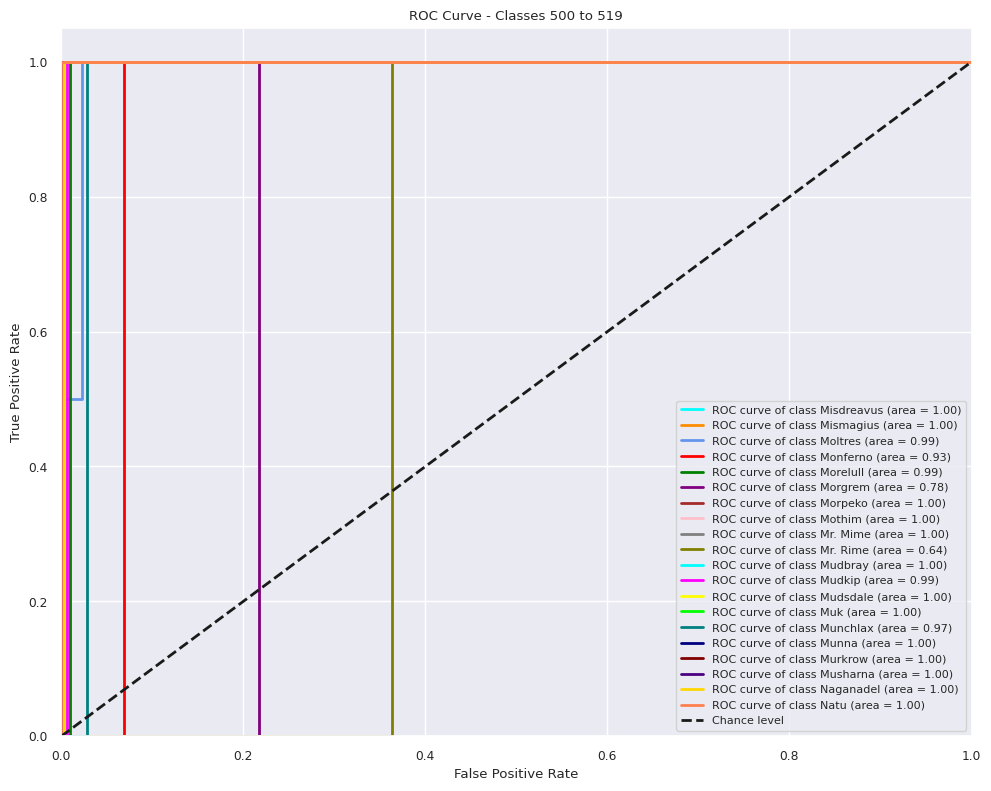

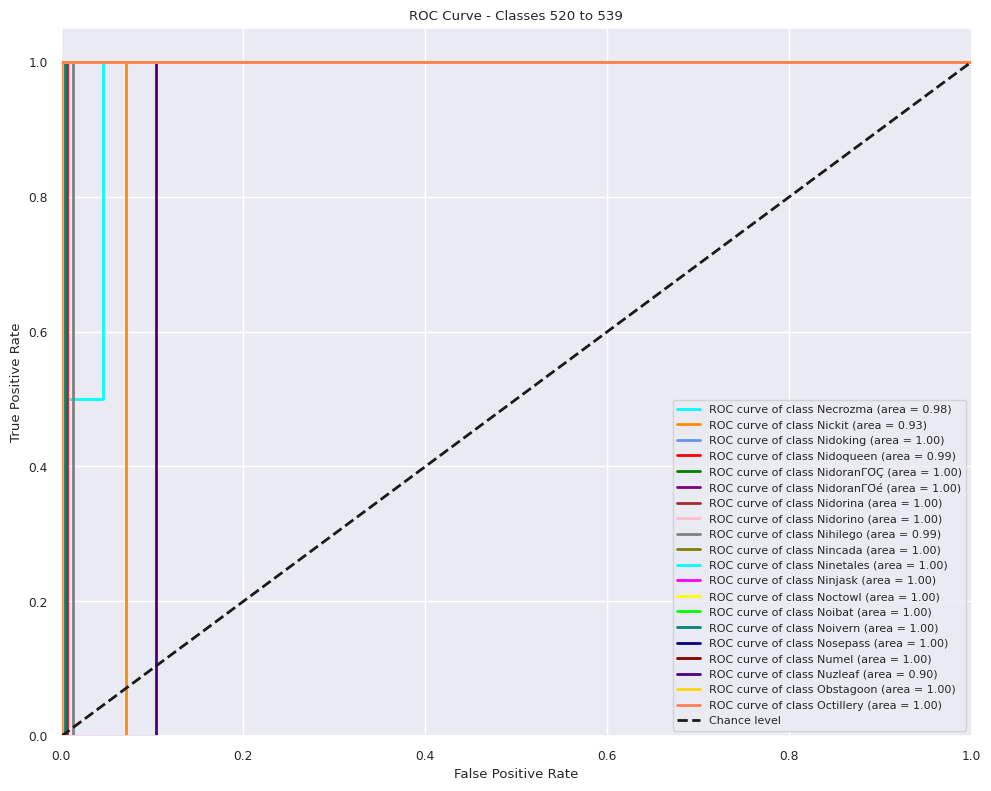

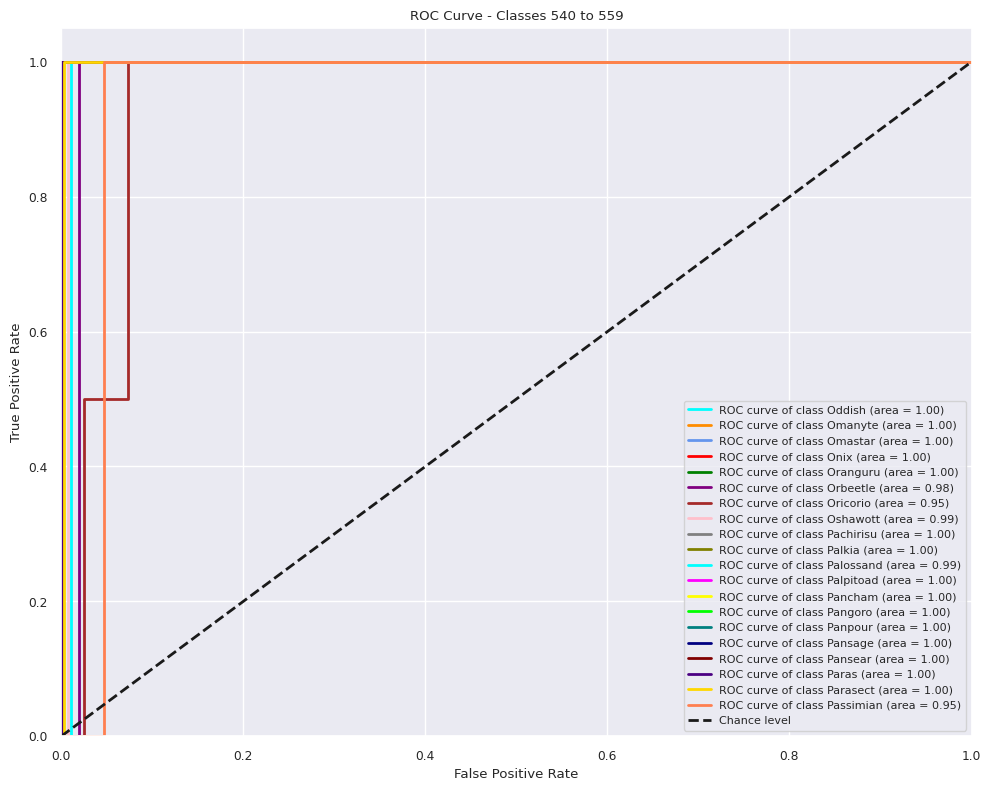

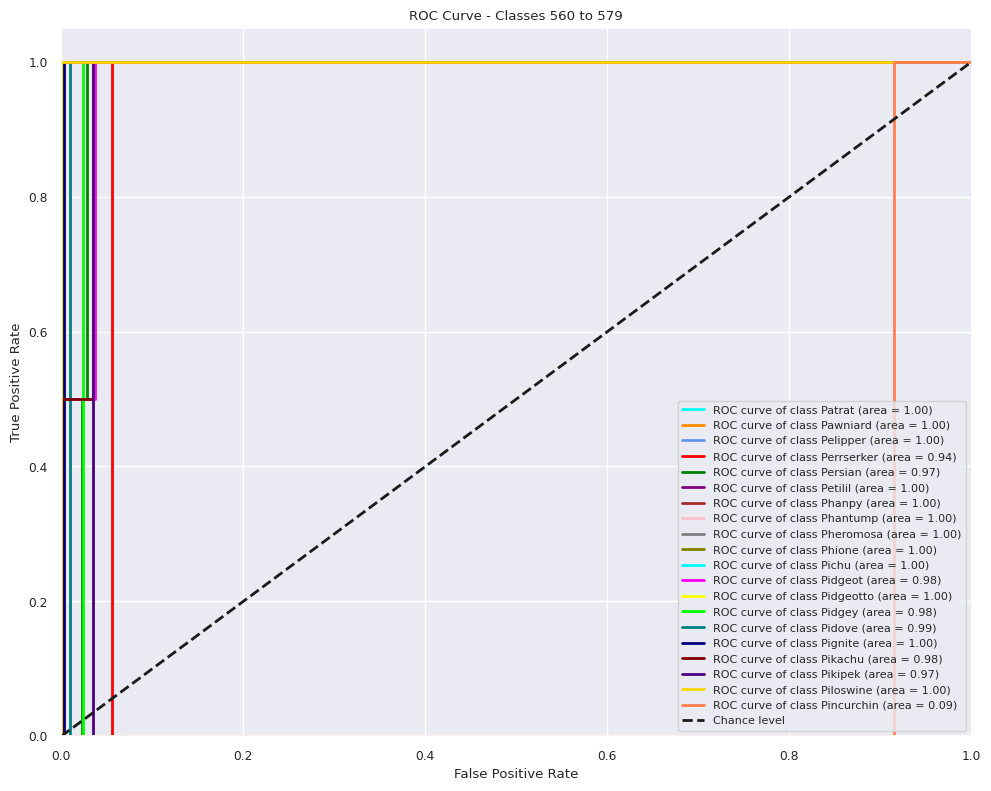

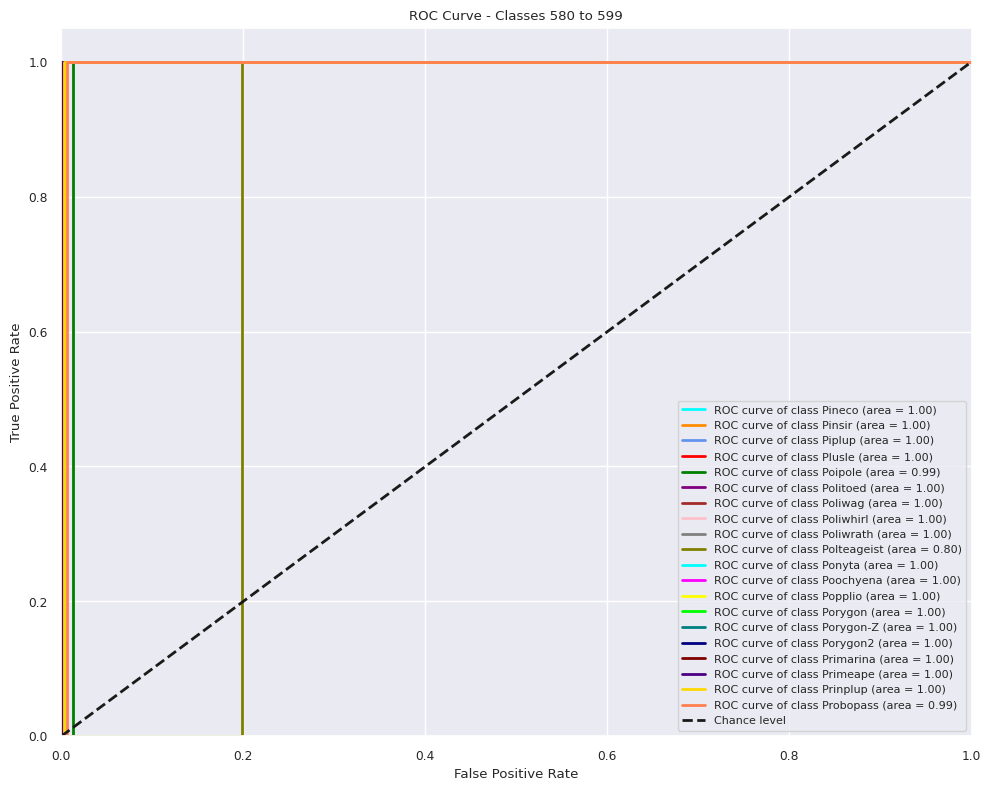

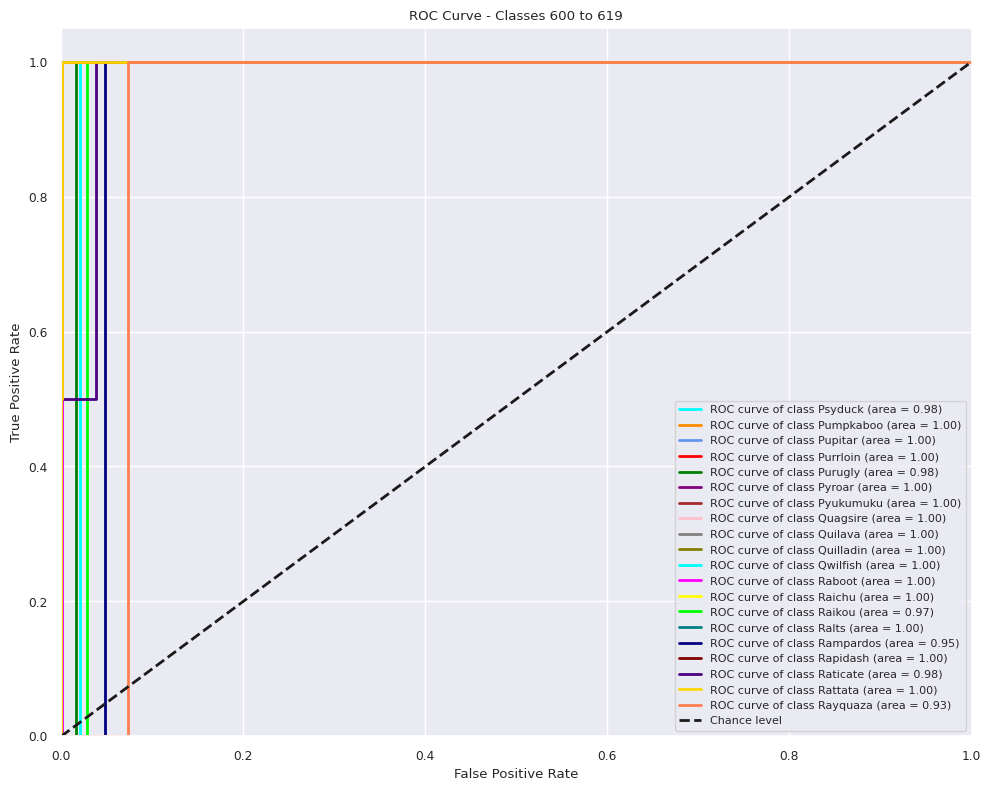

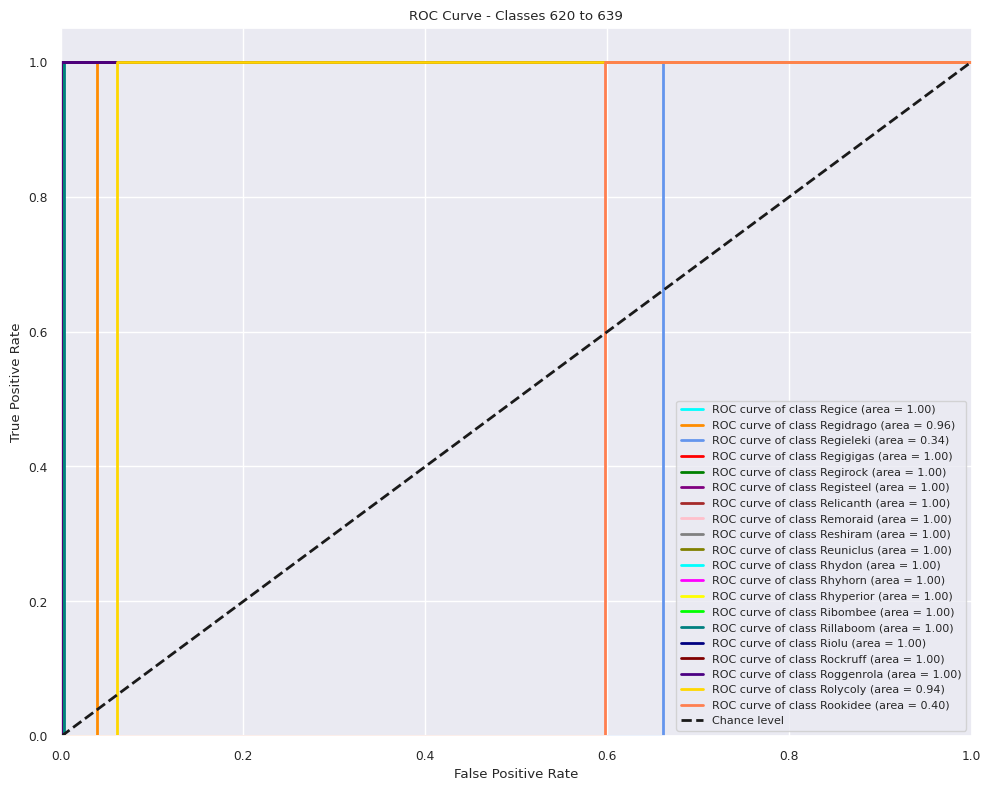

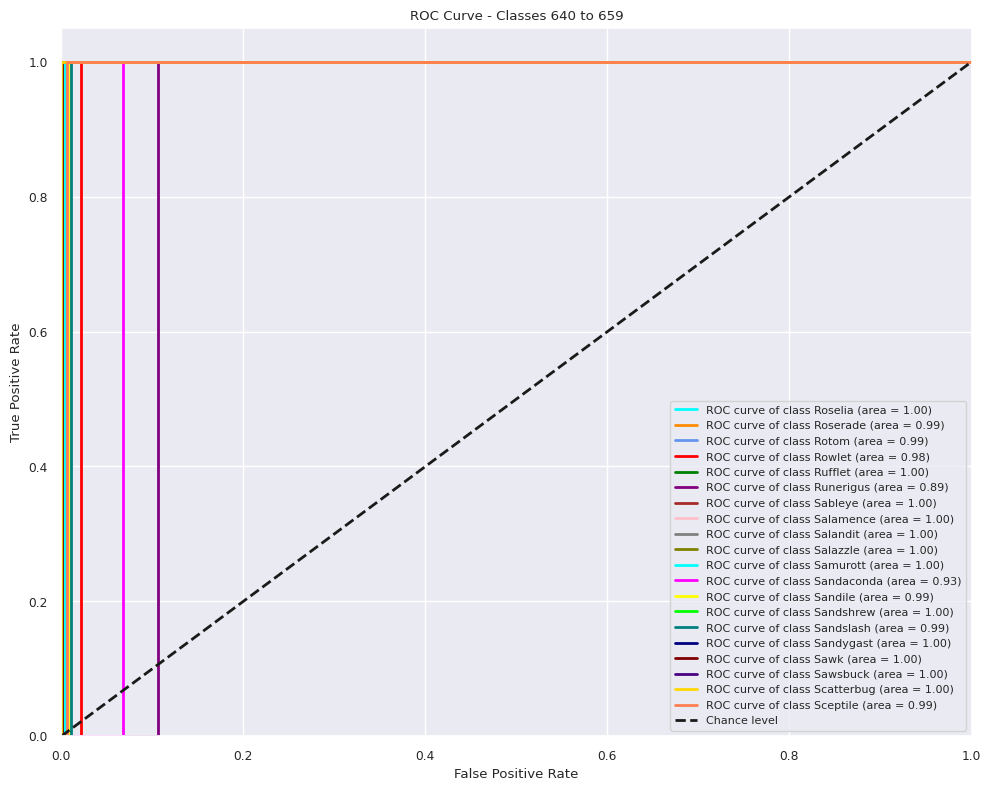

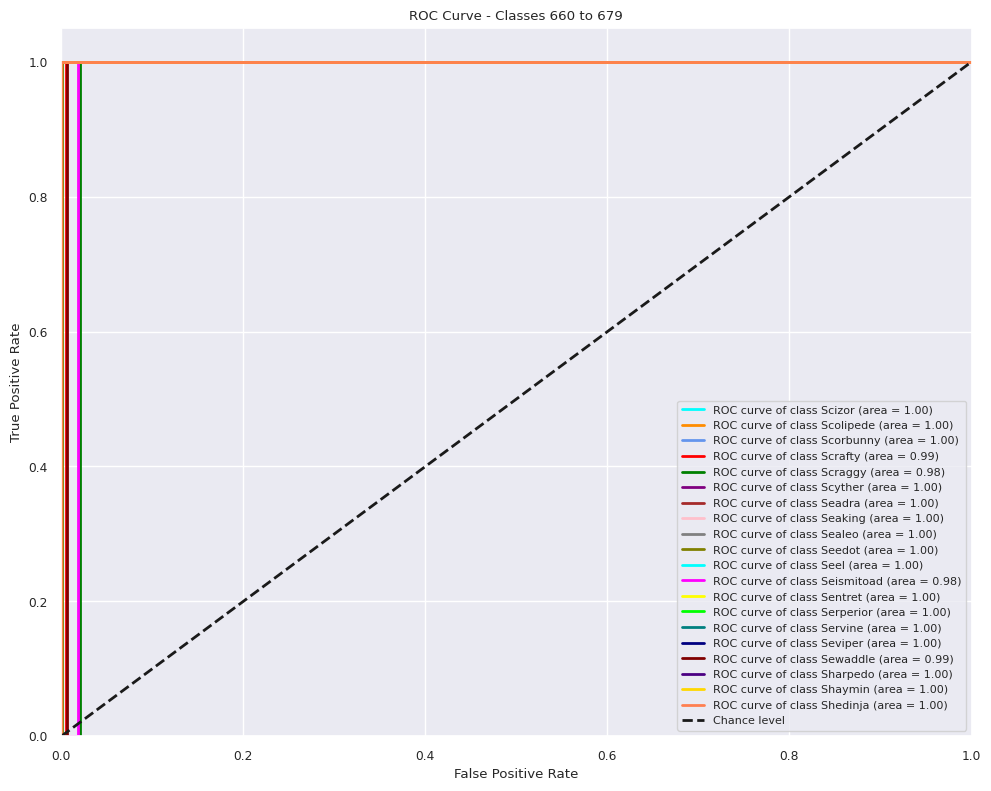

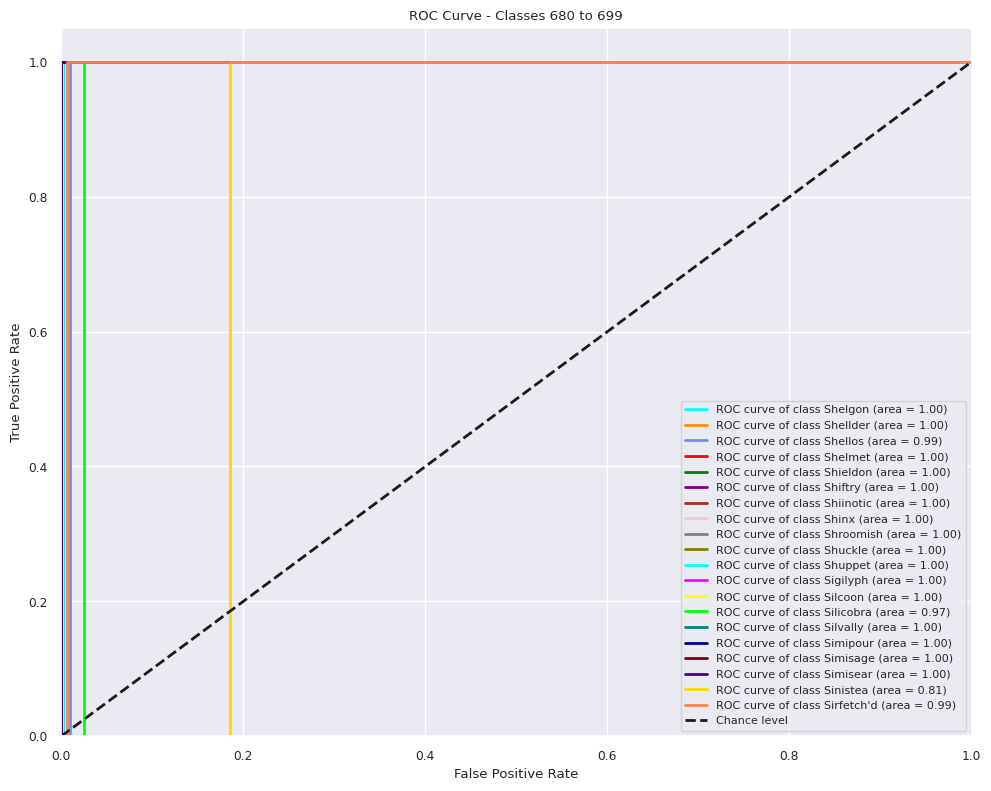

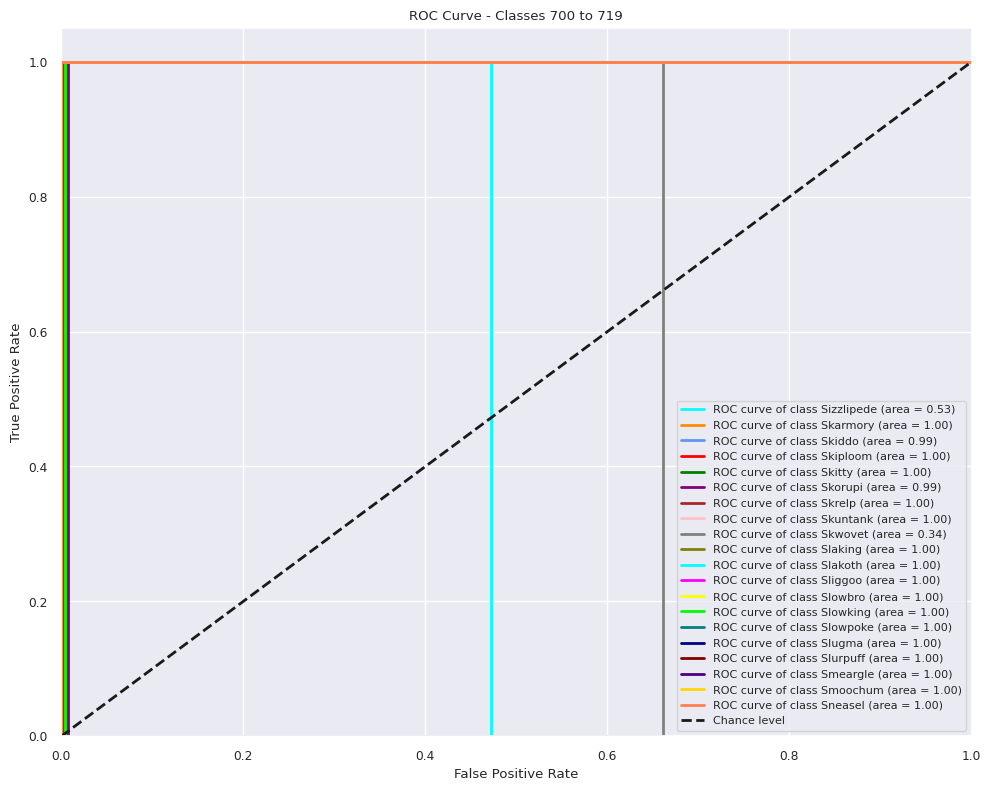

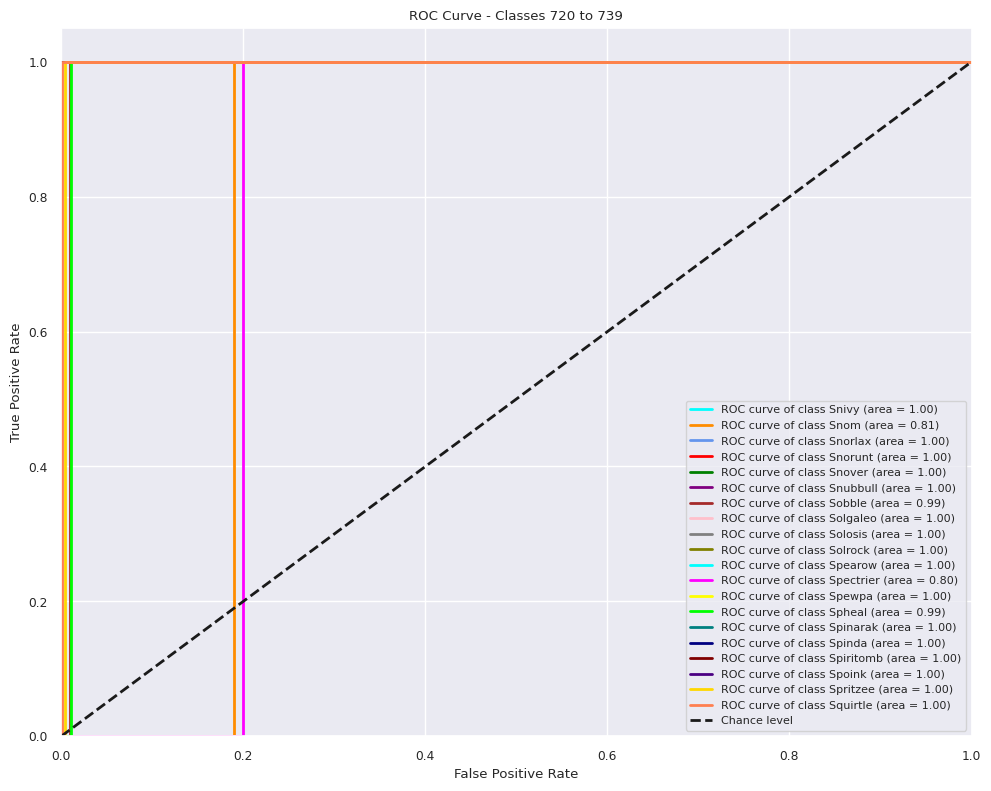

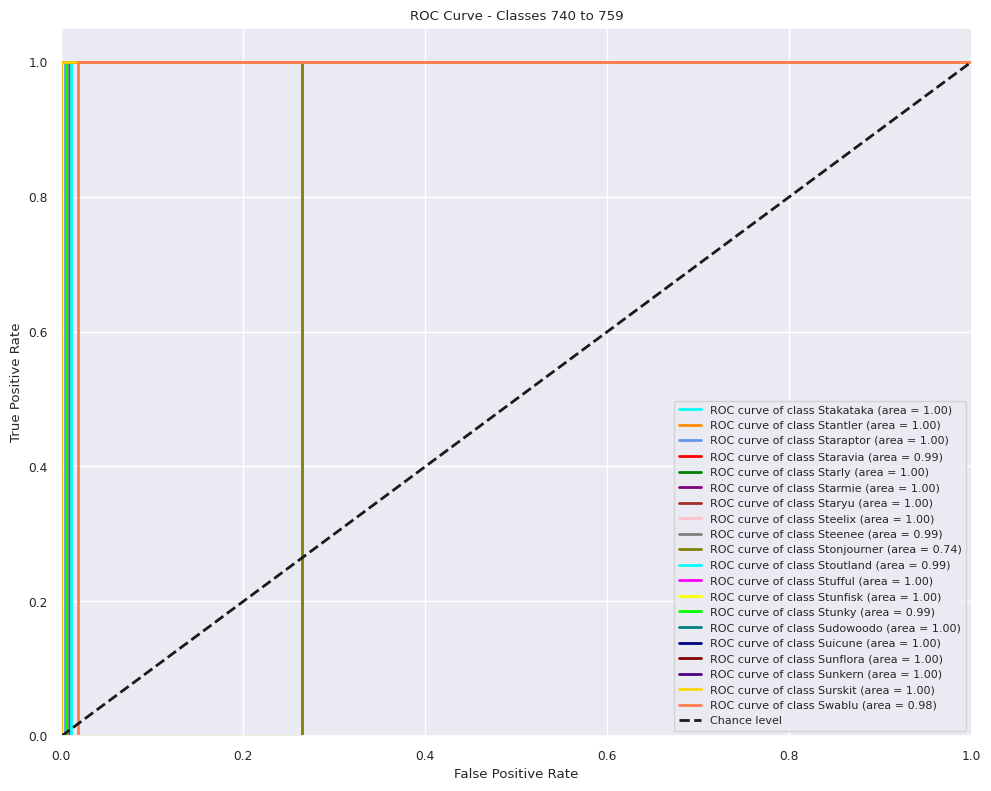

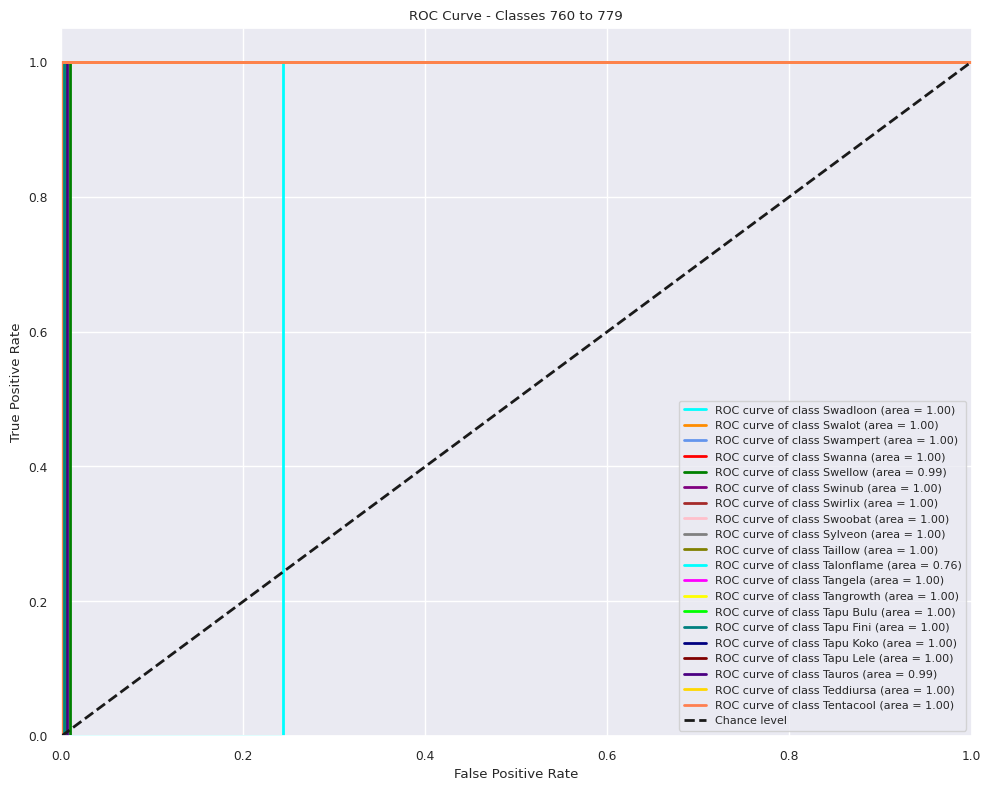

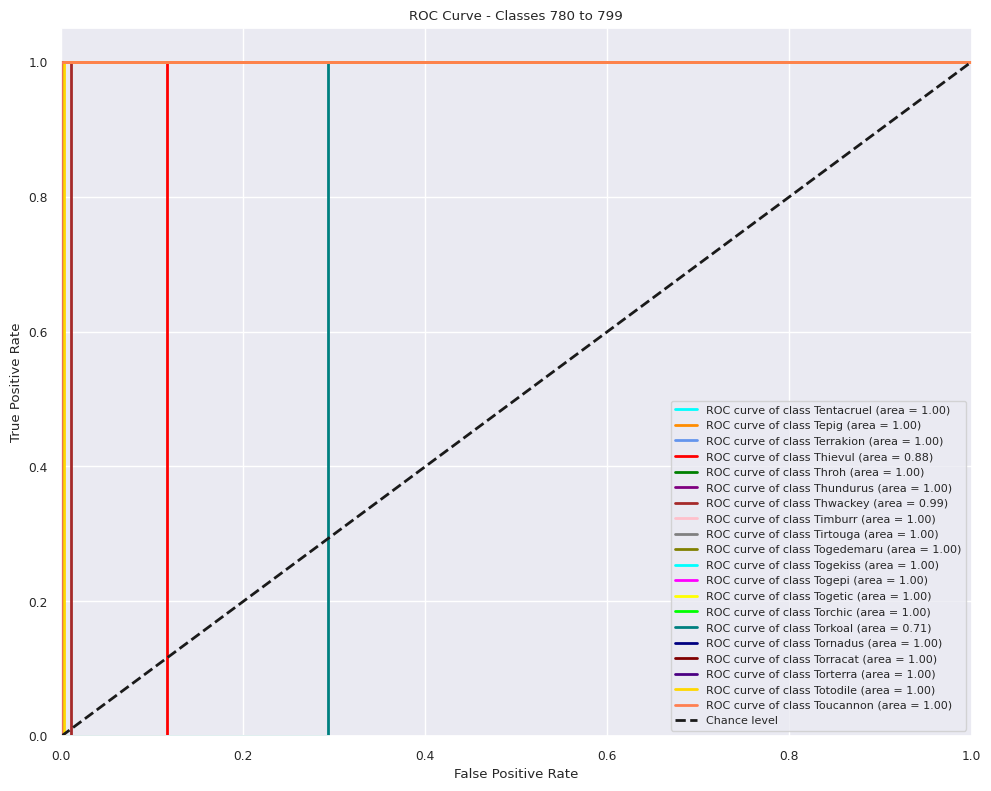

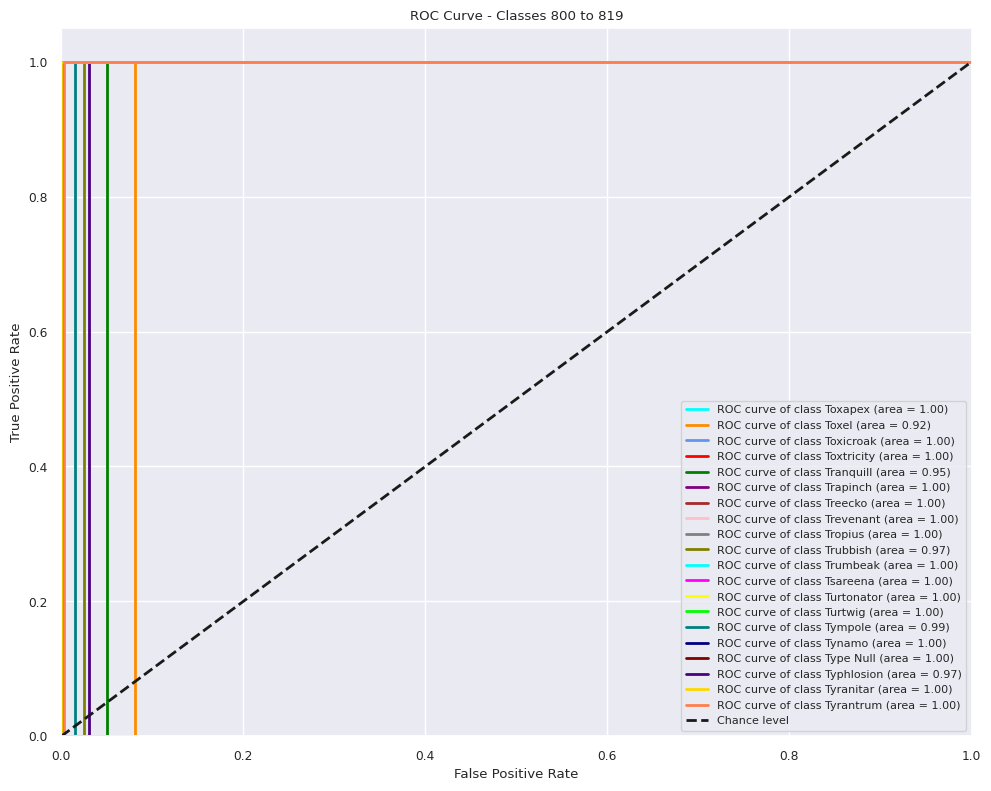

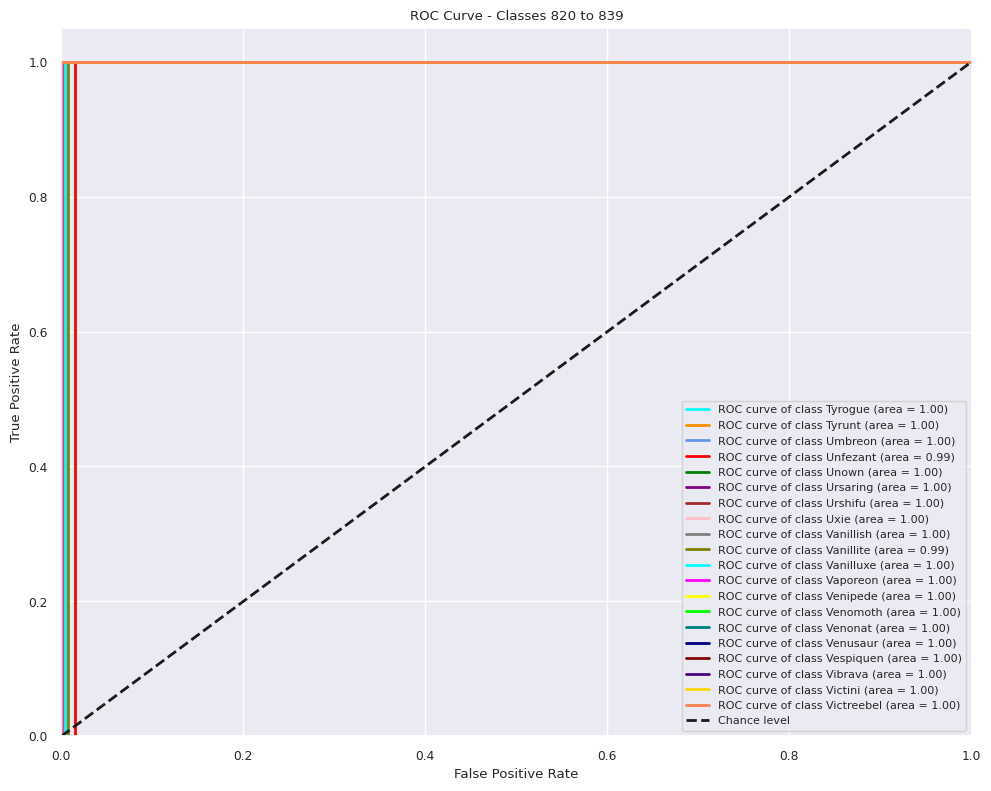

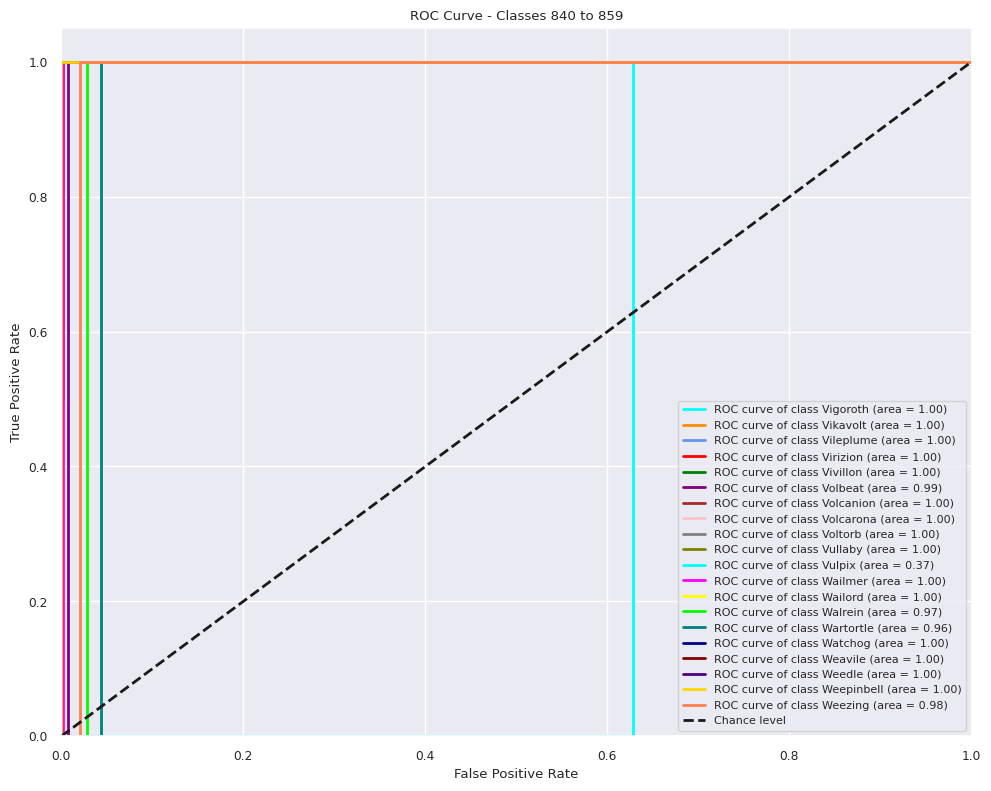

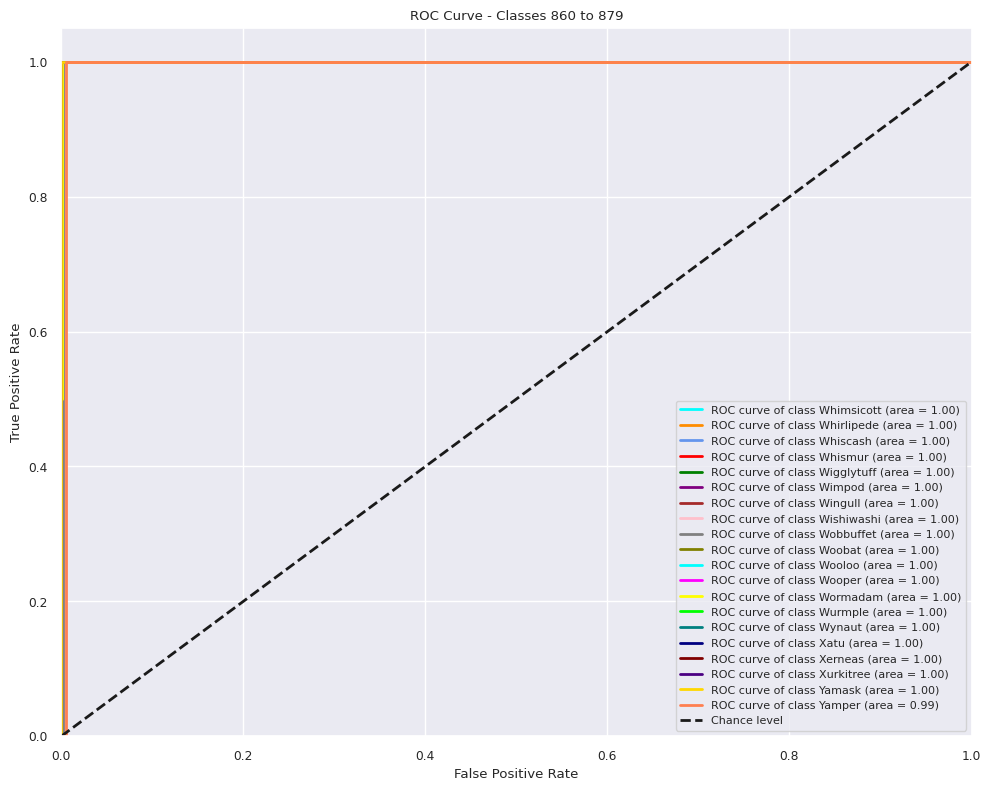

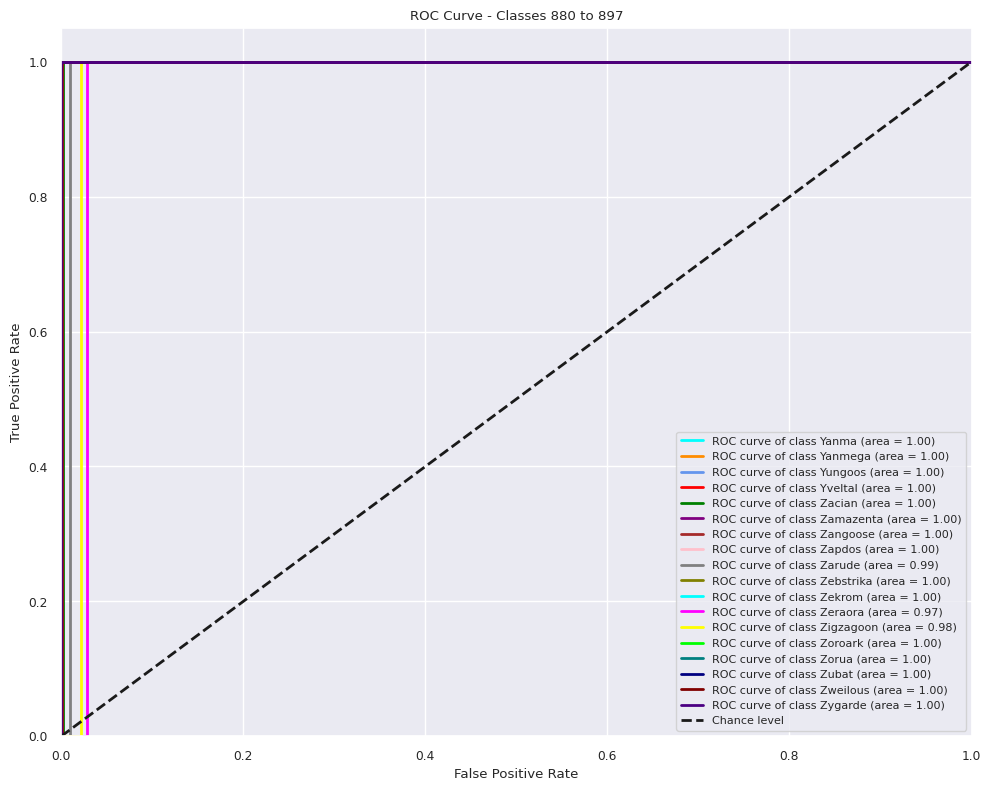

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from itertools import cycle

# Helper function to get true labels, predictions, and class names
def get_predictions_and_labels(model, test_generator):
    test_generator.reset()
    Y_pred = model.predict(test_generator, steps=len(test_generator))
    y_true = test_generator.classes
    class_names = list(test_generator.class_indices.keys())

    # Convert y_true to one-hot encoding for ROC AUC calculation
    y_true_one_hot = np.zeros((len(y_true), len(class_names)))
    for i, label in enumerate(y_true):
        y_true_one_hot[i, label] = 1

    return y_true_one_hot, Y_pred, class_names

def plot_roc_auc_multigraph(y_true_one_hot, Y_pred, class_names, classes_per_subplot=20):
    n_classes = len(class_names)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_one_hot[:, i], Y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plotting ROC curves in subplots
    num_subplots = (n_classes + classes_per_subplot - 1) // classes_per_subplot

    for subplot_idx in range(num_subplots):
        plt.figure(figsize=(10, 8))
        start_class_idx = subplot_idx * classes_per_subplot
        end_class_idx = min((subplot_idx + 1) * classes_per_subplot, n_classes)

        colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow', 'lime', 'teal', 'navy', 'maroon', 'indigo', 'gold', 'coral'])

        for i, color in zip(range(start_class_idx, end_class_idx), colors):
            plt.plot(fpr[i], tpr[i], color=color, lw=2,
                     label='ROC curve of class {0} (area = {1:0.2f})'
                           ''.format(class_names[i], roc_auc[i]))

        plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Chance level')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - Classes {start_class_idx} to {end_class_idx-1}')
        plt.legend(loc="lower right", fontsize='small')
        plt.grid(True)
        plt.tight_layout()
        plt.savefig(f'roc_auc_subplot_{subplot_idx+1}.png')
        plt.show()

# Get the data
y_true_one_hot, Y_pred, class_names = get_predictions_and_labels(model, test_generator)

# Plot the ROC AUC curves
plot_roc_auc_multigraph(y_true_one_hot, Y_pred, class_names, classes_per_subplot=20)
